# Projet A3 Introduction à la recherche opérationnelle.

### réalisé par Romain D'Hem, François David, Quentin Carbonnel

# Partie 1

In [43]:
import openpyxl

def read_excel_data(file_path):
    """
    Lit le fichier Excel et extrait les données en ignorant les lignes invalides.
    Retourne une liste de dictionnaires contenant les objets avec leurs masses et utilités.
    """
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active

    objects = []
    for row in sheet.iter_rows(min_row=2, values_only=True):
        name, masse, utilite = row
        try:
            masse = float(str(masse).replace(',', '.'))
            utilite = float(str(utilite).replace(',', '.'))
            objects.append({
                "name": name,
                "masse": masse,
                "utilite": utilite
            })
        except ValueError:
            continue  # Ignore les lignes qui ne peuvent pas être converties en float

    return objects


### Question 1 :

In [44]:
import math

# Chemin vers le fichier Excel
file_path = "Tableau_donnees_sac_a_dos_Velo.xlsx"  # Remplacez par le chemin correct

# Lire les données du fichier Excel
objects = read_excel_data(file_path)

# Nombre total d'objets
total_objects = len(objects)

# Fonction pour calculer les combinaisons
def comb(n, k):
    return math.comb(n, k)

# Calcul des combinaisons pour N = 1, 2, 10, 23
N_values = [1, 2, 10, 23]
combinations = {N: comb(total_objects, N) for N in N_values}

# Affichage des résultats
for N in N_values:
    print(f"Nombre de sacs à dos contenant {N} objets: {combinations[N]}")


Nombre de sacs à dos contenant 1 objets: 23
Nombre de sacs à dos contenant 2 objets: 253
Nombre de sacs à dos contenant 10 objets: 1144066
Nombre de sacs à dos contenant 23 objets: 1


### Question 2 :

In [45]:
# Chemin vers le fichier Excel
file_path = "Tableau_donnees_sac_a_dos_Velo.xlsx"  # Remplacez par le chemin correct

# Lire les données du fichier Excel
objects = read_excel_data(file_path)

# Nombre total d'objets
total_objects = len(objects)

# Nombre total d'organisations de sac à dos, y compris le sac à dos vide
total_combinations = 2 ** total_objects

print(f"Nombre total d'organisations de sac à dos: {total_combinations}")


Nombre total d'organisations de sac à dos: 8388608


### Question 3 :

In [46]:
# Chemin vers le fichier Excel
file_path = "Tableau_donnees_sac_a_dos_Velo.xlsx"  # Remplacez par le chemin correct

# Lire les données du fichier Excel
objects = read_excel_data(file_path)


def knapsack_dp(objects, max_masse):
    n = len(objects)
    max_weight = int(max_masse * 100)
    dp = [0] * (max_weight + 1)
    keep = [[0] * (max_weight + 1) for _ in range(n)]

    for i in range(n):
        weight = int(objects[i]["masse"] * 100)
        value = objects[i]["utilite"]
        for j in range(max_weight, weight - 1, -1):
            if dp[j] < dp[j - weight] + value:
                dp[j] = dp[j - weight] + value
                keep[i][j] = 1

    best_value = max(dp)
    best_combination = []
    w = dp.index(best_value)

    for i in range(n - 1, -1, -1):
        if keep[i][w] == 1:
            best_combination.append(objects[i])
            w -= int(objects[i]["masse"] * 100)

    return best_combination, best_value


# Résoudre le problème pour C = 0.6
C = 0.6
best_combination, best_value = knapsack_dp(objects, C)

print(f"Meilleure combinaison pour C = {C}:")
for obj in best_combination:
    print(f"{obj['name']} - Masse: {obj['masse']} - Utilité: {obj['utilite']}")
print(f"Utilité totale: {best_value}")


Meilleure combinaison pour C = 0.6:
Rustines - Masse: 0.05 - Utilité: 1.5
Maillon rapide - Masse: 0.05 - Utilité: 1.4
Multi-tool - Masse: 0.2 - Utilité: 1.7
Démonte-pneus - Masse: 0.1 - Utilité: 1.5
Pompe - Masse: 0.2 - Utilité: 1.5
Utilité totale: 7.6


### Question 4 :

## Algorithme Papier : Force Brute pour le Sac à Dos

### Description de l'algorithme
1. Générer toutes les combinaisons possibles des objets.
2. Pour chaque combinaison :
   - Calculer la masse totale.
   - Calculer l'utilité totale.
   - Si la masse totale est inférieure ou égale à la capacité \( C \) et l'utilité totale est la meilleure trouvée jusqu'à présent, enregistrer cette combinaison comme la meilleure.
3. Retourner la meilleure combinaison trouvée.

### Compter les opérations
1. **Générer toutes les combinaisons possibles des objets** : \( 2^n \) combinaisons pour \( n \) objets.
2. **Calculer la masse totale et l'utilité totale pour chaque combinaison** :
   - Comparaisons : \( 2^n \) (pour chaque combinaison, vérifier la masse totale et l'utilité totale)
   - Additions : \( n \) par combinaison (somme des masses et utilités des objets dans chaque combinaison)
3. **Enregistrer la meilleure combinaison** :
   - Comparaison : \( 2^n \) (vérifier si l'utilité totale est la meilleure)

### Algorithme en Pseudocode
```
 Algorithm KnapsackBruteForce(objects, C)
    best_value <- 0
    best_combination <- []

    for each combination in PowerSet(objects)
        total_mass <- 0
        total_value <- 0
        for each object in combination
            total_mass <- total_mass + object.mass
            total_value <- total_value + object.value
        end for
        if total_mass <= C and total_value  best_value
            best_value <- total_value
            best_combination <- combination
        end if
    end for

    return best_combination, best_value
 end Algorithm
```

### Compteur d'Opérations

Pour une combinaison donnée :
- Comparaison pour vérifier si la masse totale est inférieure ou égale à \( C \) : 1
- Comparaison pour vérifier si l'utilité totale est meilleure que la meilleure trouvée : 1
- \( n \) additions pour calculer la masse totale
- \( n \) additions pour calculer l'utilité totale

Pour \( 2^n \) combinaisons :
- Comparaisons : \( 2^n \times 2 = 2^{n+1} \)
- Additions : \( 2^n \times n \times 2 = 2^n \times 2n = 2^{n+1} \times n \)

### Algorithme en Python

Pour illustrer cela en Python, voici le script qui implémente cet algorithme et compte les opérations :

 from itertools import chain, combinations
 from utils import read_excel_data

 ## Chemin vers le fichier Excel
 file_path = "Tableau_donnees_sac_a_dos.xlsx"

 ## Lire les données du fichier Excel
 objects = read_excel_data(file_path)
```
 def knapsack_bruteforce(objects, C):
    best_value = 0
    best_combination = []
    for r in range(1, len(objects) + 1):
        for combination in combinations(objects, r):
            total_mass = sum(obj["masse"] for obj in combination)
            total_value = sum(obj["utilite"] for obj in combination)
            if total_mass <= C and total_value  best_value:
                best_value = total_value
                best_combination = combination

    return best_combination, best_value
```

### Question 5 :

In [47]:
import time
def algorithme_glouton(objets, C):
    # Trier les objets par utilité/poids décroissant
    objets_triees = sorted(objets, key=lambda x: x['utilite'] / x['masse'], reverse=True)

    sac = []
    poids_total = 0

    for objet in objets_triees:
        if poids_total + objet['masse'] <= C:
            sac.append(objet)
            poids_total += objet['masse']

    return sac

# Lire les données du fichier Excel
fichier = 'Tableau_donnees_sac_a_dos_Velo.xlsx'
objets = read_excel_data(fichier)

# Capacité maximale du sac à dos
C = 5

# Fonction à mesurer
def execute_glouton():
    algorithme_glouton(objets, C)

# Valeurs de n pour les tests
n_values = [10, 100, 1000, 10000]

# Mesurer le temps avec répétitions
start_time = time.time()
execute_glouton()
end_time = time.time()
# Calculer le nombre total d'organisations possibles
N = len(objets)
total_organisations = 2 ** N

# Afficher les résultats
print(f"Nombre total d'organisations possibles: {total_organisations}")
print(end_time - start_time)

Nombre total d'organisations possibles: 8388608
0.0


### Question 6 :

In [48]:
# Question 6 :
# Durée moyenne par opération (approximée à partir des résultats précédents)
T_moyen = sum(durée_par_opération.values()) / len(durée_par_opération)

# Nombre total de combinaisons pour 23 objets
total_combinations = 2**23

# Temps total nécessaire pour tester toutes les combinaisons
temps_total = T_moyen * total_combinations

print("Question 6 : ",temps_total)


Question 6 :  0.075648


### Question 7

## Question 7: Rédiger un algorithme papier pour la résolution exacte du problème du sac à dos. On l’appellera A.

### Algorithme A : Résolution exacte du problème du sac à dos

1. **Initialisation**
   - Soit `L` la liste des objets, chaque objet `o` ayant un poids `poidso` et une utilité `utiliteo`.
   - Soit `C` la capacité maximale du sac à dos.
   - Créer une matrice `K` de dimensions `(N+1) x (C+1)` où `N` est le nombre d'objets.
   - Initialiser `K[i][w] = 0` pour tout `i` dans `[0, N]` et `w` dans `[0, C]`.

2. **Remplissage de la matrice**
   - Pour chaque objet `i` de `1` à `N`:
     - Pour chaque capacité `w` de `0` à `C`:
       - Si `poidso[i-1] <= w`:
         - `K[i][w] = max(utiliteo[i-1] + K[i-1][w-poidso[i-1]], K[i-1][w])`
       - Sinon:
         - `K[i][w] = K[i-1][w]`

3. **Extraction de la solution optimale**
   - La valeur optimale est `K[N][C]`.
   - Pour retrouver les objets choisis:
     - Initialiser `w = C` et créer une liste `objets_choisis`.
     - Pour `i` de `N` à `1`:
       - Si `K[i][w] != K[i-1][w]`:
         - Ajouter l'objet `i-1` à la liste `objets_choisis`.
         - Mettre à jour `w = w - poidso[i-1]`.

4. **Résultat**
   - La liste `objets_choisis` contient les indices des objets à mettre dans le sac à dos.
   - La valeur totale de l'utilité maximale est `K[N][C]`.

 ```python
def knapsack(L, C):
     N = len(L)
     K = [[0 for _ in range(C + 1)] for _ in range(N + 1)]
     
     for i in range(1, N + 1):
         for w in range(C + 1):
             if L[i-1][0] <= w:
                 K[i][w] = max(L[i-1][1] + K[i-1][w-L[i-1][0]], K[i-1][w])
             else:
                 K[i][w] = K[i-1][w]
     
     w = C
     objets_choisis = []
     for i in range(N, 0, -1):
         if K[i][w] != K[i-1][w]:
             objets_choisis.append(i-1)
             w -= L[i-1][0]
     
     return K[N][C], objets_choisis
 ```

### Explication
- **Initialisation**: La matrice `K` est initialisée avec des zéros, représentant les utilités maximales pour différentes capacités et objets.
- **Remplissage de la matrice**: La matrice est remplie en utilisant une approche dynamique. Chaque cellule `K[i][w]` représente la valeur maximale de l'utilité que l'on peut obtenir en utilisant les premiers `i` objets avec une capacité maximale `w`.
- **Extraction de la solution optimale**: Une fois la matrice remplie, nous pouvons retrouver les objets choisis en retraçant nos pas dans la matrice `K`.
- **Résultat**: La fonction retourne la valeur maximale de l'utilité et les indices des objets choisis pour atteindre cette utilité.


### Question 8

In [49]:
import openpyxl
def knapsack(L, C):
    """
    Résout le problème du sac à dos en utilisant un algorithme exact (Programmation Dynamique).

    Arguments :
    L : liste de tuples où chaque tuple représente un objet avec (poids, utilité)
    C : capacité maximale du sac à dos

    Retourne :
    (utilité maximale, liste des indices des objets choisis)
    """
    N = len(L)
    # Convertir les poids en entiers en multipliant par 100
    C = int(C * 100)
    L = [(int(weight * 100), value) for weight, value in L]

    # Initialisation de la matrice K avec des zéros
    K = [[0 for _ in range(C + 1)] for _ in range(N + 1)]

    # Remplissage de la matrice K
    for i in range(1, N + 1):
        for w in range(C + 1):
            if L[i-1][0] <= w:
                K[i][w] = max(L[i-1][1] + K[i-1][w-L[i-1][0]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]

    # Extraction de la solution optimale
    w = C
    objets_choisis = []
    for i in range(N, 0, -1):
        if K[i][w] != K[i-1][w]:
            objets_choisis.append(i-1)
            w -= L[i-1][0]

    # Retourner l'utilité maximale et la liste des objets choisis
    return K[N][C], objets_choisis

# Lire les données à partir du fichier Excel
file_path = 'Tableau_donnees_sac_a_dos_Velo.xlsx'  # Remplacez par le chemin correct vers votre fichier
objects = read_excel_data(file_path)

# Préparer les données pour l'algorithme du sac à dos
L = [(obj['masse'], obj['utilite']) for obj in objects]
C = 0.6  # Par exemple, la capacité maximale du sac à dos

# Résoudre le problème du sac à dos
utilite_maximale, objets_choisis_indices = knapsack(L, C)

# Afficher les résultats
print("Utilité maximale :", utilite_maximale)
print("Objets choisis :")
for index in objets_choisis_indices:
    print(objects[index]['name'])


Utilité maximale : 7.6
Objets choisis :
Rustines
Maillon rapide
Multi-tool
Démonte-pneus
Pompe


### Question 9

In [50]:
import time

def main():
    # Lire les données à partir du fichier Excel
    file_path = 'Tableau_donnees_sac_a_dos_Velo.xlsx'
    objects = read_excel_data(file_path)

    # Préparer les données pour l'algorithme du sac à dos
    L = [(obj['masse'], obj['utilite']) for obj in objects]

    # Capacités à tester
    capacities = [2, 3, 4, 5]

    # Stocker les résultats
    results = []

    for C in capacities:
        # Mesurer le temps de calcul pour chaque capacité
        start_time = time.perf_counter()
        utilite_maximale, objets_choisis_indices = knapsack(L, C)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time

        # Stocker le résultat pour cette capacité
        result = {
            "Capacité": C,
            "Utilité maximale": utilite_maximale,
            "Objets choisis": [objects[index]['name'] for index in objets_choisis_indices],
            "Temps de calcul (s)": elapsed_time
        }
        results.append(result)

    # Afficher les résultats
    for result in results:
        print(f"Capacité: {result['Capacité']}")
        print(f"Utilité maximale: {result['Utilité maximale']}")
        print("Objets choisis:")
        for obj in result["Objets choisis"]:
            print(f"- {obj}")
        print(f"Temps de calcul: {result['Temps de calcul (s)']:.6f} secondes")
        print()

if __name__ == "__main__":
    main()


Capacité: 2
Utilité maximale: 15.050000000000002
Objets choisis:
- Rustines
- Maillon rapide
- Lampes
- Téléphone mobile
- Crème solaire
- Compresses
- Couteau suisse
- Multi-tool
- Démonte-pneus
- Pompe
Temps de calcul: 0.002210 secondes

Capacité: 3
Utilité maximale: 17.85
Objets choisis:
- Rustines
- Maillon rapide
- Lampes
- Téléphone mobile
- Carte IGN
- Crème solaire
- Veste de pluie
- Désinfectant
- Compresses
- Couteau suisse
- Multi-tool
- Clé de 15
- Démonte-pneus
- Pompe
Temps de calcul: 0.003088 secondes

Capacité: 4
Utilité maximale: 19.950000000000003
Objets choisis:
- Rustines
- Fruits
- Barre de céréales
- Maillon rapide
- Lampes
- Téléphone mobile
- Carte IGN
- Crème solaire
- Veste de pluie
- Désinfectant
- Compresses
- Couteau suisse
- Multi-tool
- Clé de 15
- Démonte-pneus
- Pompe
Temps de calcul: 0.004733 secondes

Capacité: 5
Utilité maximale: 22.0
Objets choisis:
- Rustines
- Fruits
- Barre de céréales
- Maillon rapide
- Lampes
- Téléphone mobile
- Carte IGN
- Cr

### Question 10

## Question 10: Rédiger un algorithme papier heuristique pour la résolution du problème du sac à dos. On l’appellera B.

### Algorithme B : Résolution heuristique du problème du sac à dos

### Heuristique : Glouton basé sur le rapport utilité/poids

1. **Initialisation**
   - Soit `L` la liste des objets, chaque objet `o` ayant un poids `poidso` et une utilité `utiliteo`.
   - Soit `C` la capacité maximale du sac à dos.
   - Créer une liste vide `objets_choisis`.
   - Initialiser `poids_total = 0` et `utilite_totale = 0`.

2. **Calcul des rapports utilité/poids**
   - Pour chaque objet `o` dans `L`:
     - Calculer le rapport `r[o] = utiliteo / poidso`.

3. **Tri des objets**
   - Trier les objets dans `L` par ordre décroissant de leur rapport `r[o]`.

4. **Sélection des objets**
   - Pour chaque objet `o` dans `L` trié:
     - Si `poids_total + poidso ≤ C`:
       - Ajouter `o` à `objets_choisis`.
       - Mettre à jour `poids_total = poids_total + poidso`.
       - Mettre à jour `utilite_totale = utilite_totale + utiliteo`.

5. **Résultat**
   - La liste `objets_choisis` contient les objets sélectionnés pour maximiser l'utilité.
   - La valeur totale de l'utilité est `utilite_totale`.

### Pseudocode

```python
**Début**:
- `rapports` ← Liste vide
- **Pour chaque** objet `obj` **dans** `L` **faire**:
  - Calculer le rapport utilité/poids pour `obj` et l'ajouter à `rapports`.

- Trier `rapports` par ordre décroissant basé sur le rapport utilité/poids.

- `poids_total` ← 0
- `utilite_totale` ← 0
- `objets_choisis` ← Liste vide

- **Pour chaque** `i` **dans** `rapports` **faire**:
  - Récupérer le poids et l'utilité de l'objet correspondant dans `L`.
  - **Si** ajouter cet objet ne dépasse pas la capacité `C` **alors**:
    - Ajouter l'indice de l'objet à `objets_choisis`.
    - Mettre à jour `poids_total` et `utilite_totale`.

- **Retourner** `utilite_totale` et `objets_choisis`.
  
**Fin de la fonction**
```

### Question 11

In [51]:
# Importation des modules nécessaires
import time

# Définition de l'algorithme heuristique B pour le problème du sac à dos
def heuristique_sac_a_dos(L, C):
    """
    Résout le problème du sac à dos en utilisant une heuristique basée sur le rapport utilité/poids.

    Arguments :
    L : liste de tuples où chaque tuple représente un objet avec (poids, utilité)
    C : capacité maximale du sac à dos

    Retourne :
    (utilité totale, liste des indices des objets choisis)
    """
    # Calcul des rapports utilité/poids
    rapports = [(i, obj[1] / obj[0]) for i, obj in enumerate(L)]

    # Tri des objets par ordre décroissant de leur rapport utilité/poids
    rapports.sort(key=lambda x: x[1], reverse=True)

    poids_total = 0
    utilite_totale = 0
    objets_choisis = []

    # Sélection des objets
    for i, _ in rapports:
        poids, utilite = L[i]
        if poids_total + poids <= C:
            objets_choisis.append(i)
            poids_total += poids
            utilite_totale += utilite

    return utilite_totale, objets_choisis


# Fonction pour mesurer le temps d'exécution pour chaque valeur de C
def measure_execution_time(L, capacities):
    times = {}

    for C in capacities:
        start_time = time.perf_counter()
        utilite_maximale, objets_choisis_indices = heuristique_sac_a_dos(L, C)
        end_time = time.perf_counter()
        execution_time = end_time - start_time
        times[C] = execution_time, utilite_maximale, objets_choisis_indices

    return times


# Fonction principale pour exécuter le script
def main():
    # Chemin vers votre fichier Excel
    file_path = "Tableau_donnees_sac_a_dos_Velo.xlsx"

    # Lecture des données à partir du fichier Excel en utilisant la fonction read_excel_data
    data = read_excel_data(file_path)

    # Extraction des masses et utilités sous forme de listes de tuples (masse, utilité)
    L = [(obj['masse'], obj['utilite']) for obj in data]

    # Capacités pour lesquelles nous voulons résoudre le problème du sac à dos
    capacities = [2, 3, 4, 5]

    # Mesure du temps d'exécution pour chaque valeur de C
    times = measure_execution_time(L, capacities)

    # Affichage des résultats
    for C in capacities:
        execution_time, utilite_maximale, objets_choisis_indices = times[C]
        print(f"Pour C = {C}:")
        print(f"   Utilité maximale : {utilite_maximale}")
        print(f"   Objets choisis :")
        for indice in objets_choisis_indices:
            print(f"      {data[indice]['name']}")
        print(f"   Temps d'exécution : {execution_time:.6f} secondes")
        print()


# Vérification si le script est exécuté en tant que programme principal
if __name__ == "__main__":
    main()


Pour C = 2:
   Utilité maximale : 14.75
   Objets choisis :
      Rustines
      Maillon rapide
      Démonte-pneus
      Bouchon valve 
chromé bleu
      Multi-tool
      Pompe
      Couteau suisse
      Lampes
      Téléphone mobile
      Crème solaire
   Temps d'exécution : 0.000056 secondes

Pour C = 3:
   Utilité maximale : 17.45
   Objets choisis :
      Rustines
      Maillon rapide
      Démonte-pneus
      Bouchon valve 
chromé bleu
      Multi-tool
      Pompe
      Couteau suisse
      Lampes
      Téléphone mobile
      Crème solaire
      Compresses
      Clé de 15
      Désinfectant
      Chambre à air
      Carte IGN
   Temps d'exécution : 0.000016 secondes

Pour C = 4:
   Utilité maximale : 19.75
   Objets choisis :
      Rustines
      Maillon rapide
      Démonte-pneus
      Bouchon valve 
chromé bleu
      Multi-tool
      Pompe
      Couteau suisse
      Lampes
      Téléphone mobile
      Crème solaire
      Compresses
      Clé de 15
      Désinfectant
      Chamb

### Question 12

In [52]:
# Question 12 :
def knapsack_heuristic(capacity, weights, values):
    items = list(zip(weights, values))
    # Calculer la densité de valeur et trier par ordre décroissant
    items.sort(key=lambda x: x[1] / x[0], reverse=True)

    total_value = 0
    remaining_capacity = capacity
    selected_items = []

    for weight, value in items:
        if weight <= remaining_capacity:
            selected_items.append((weight, value))
            remaining_capacity -= weight
            total_value += value

    return total_value, selected_items

def mesure_temps_knapsack_heuristic(capacity, weights, values):
    start_time = time.time()
    max_value, selected_items = knapsack_heuristic(capacity, weights, values)
    end_time = time.time()
    return max_value, selected_items, end_time - start_time

print("Question 12")

weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacities = [2, 3, 4, 5]

heuristic_results = []

for C in capacities:
    max_value, selected_items, temps = mesure_temps_knapsack_heuristic(C, weights, values)
    heuristic_results.append((C, max_value, temps, selected_items))

# Affichage des résultats
df_heuristic_results = pd.DataFrame(heuristic_results, columns=['C', 'Valeur maximale (heuristique)', 'Temps de calcul (s)', 'Objets sélectionnés'])
print(df_heuristic_results)

Question 12
   C  Valeur maximale (heuristique)  Temps de calcul (s) Objets sélectionnés
0  2                              3                  0.0            [(2, 3)]
1  3                              3                  0.0            [(2, 3)]
2  4                              3                  0.0            [(2, 3)]
3  5                              7                  0.0    [(2, 3), (3, 4)]


### Question 13

Pour comparer les algorithmes A (exact) et B (heuristique) pour résoudre le problème du sac à dos, nous allons examiner plusieurs aspects clés : la précision, le temps de calcul et la complexité.
1. Précision :

    Algorithme A (exact) :
        Avantages :
            Donne une solution exacte au problème du sac à dos, c'est-à-dire qu'il garantit de trouver la solution optimale.
            Convient lorsque les données sont relativement petites et que la capacité du sac à dos CC n'est pas trop grande.
        Limitations :
            Peut être très coûteux en termes de temps de calcul pour des instances de grande taille en raison de sa complexité exponentielle.
            Pas toujours praticable pour des instances très volumineuses en raison de la nécessité de tester toutes les combinaisons possibles d'objets.

    Algorithme B (heuristique) :
        Avantages :
            Rapide à exécuter même pour de grandes instances grâce à sa complexité algorithmique plus faible.
            Convient pour des problèmes où une solution approximative suffit et où une solution optimale exacte n'est pas nécessaire.
        Limitations :
            Ne garantit pas de trouver la solution optimale.
            Peut donner des solutions sous-optimales dans certains cas où les objets avec un bon rapport utilité/poids sont choisis au détriment d'autres objets moins "rentables" à court terme.

2. Temps de calcul :

    Algorithme A (exact) :
        Le temps de calcul peut être prohibitif pour des instances de grande taille en raison de la complexité exponentielle.
        Convient mieux pour des instances de petite à moyenne taille où la recherche exhaustive est faisable.

    Algorithme B (heuristique) :
        Le temps de calcul est généralement beaucoup plus rapide en raison de sa stratégie de sélection d'objets basée sur des heuristiques simples.
        Performant même pour de grandes instances où l'algorithme exact serait trop lent.

3. Complexité :

    Algorithme A (exact) :
        Complexité exponentielle O(2n)O(2n), où nn est le nombre d'objets.
        Requiert une exploration exhaustive de toutes les combinaisons possibles pour garantir l'optimalité.

    Algorithme B (heuristique) :
        Complexité moindre, généralement O(nlog⁡n)O(nlogn) à O(n2)O(n2), selon la méthode heuristique utilisée.
        Ne nécessite pas une exploration exhaustive, ce qui le rend beaucoup plus rapide pour des instances de grande taille.

Conclusion :

    Choix de l'algorithme :
        Utiliser l'algorithme A (exact) lorsque la précision absolue est primordiale et que le temps de calcul n'est pas une limitation.
        Opter pour l'algorithme B (heuristique) lorsque le temps de calcul est crucial, que des solutions approximatives sont acceptables et que la recherche d'une solution exacte serait trop coûteuse.
        En pratique, la sélection entre les deux dépend des contraintes spécifiques du problème, telles que la taille des données, les exigences de temps de réponse et la tolérance à la solution approximative.

### Question 14

In [53]:
import time

# Algorithme B' approché
def heuristique_sac_a_dos_approche(L, C):
    # Calcul des rapports utilité/poids et tri
    rapports = sorted(((i, obj["utilite"] / obj["masse"], obj["masse"], obj["utilite"]) for i, obj in enumerate(L)),
                      key=lambda x: x[1], reverse=True)
    poids_total = 0
    utilite_totale = 0
    objets_choisis = []

    # Sélection des objets
    for i, _, poids, utilite in rapports:
        if poids_total + poids <= C:
            objets_choisis.append(i)
            poids_total += poids
            utilite_totale += utilite
    return utilite_totale, objets_choisis

# Fonction pour mesurer le temps d'exécution
def measure_execution_time(algo_func, L, C, repetitions=5):
    total_time = 0
    for _ in range(repetitions):
        start_time = time.perf_counter()
        algo_func(L, C)
        end_time = time.perf_counter()
        total_time += end_time - start_time
    return total_time / repetitions

# Fonction principale pour comparer les algorithmes
def main():
    file_path = 'Tableau_donnees_sac_a_dos_Velo.xlsx'
    capacities = [2, 3, 4, 5]

    # Lecture des données depuis le fichier Excel
    objects = read_excel_data(file_path)

    # Comparaison pour différentes capacités C
    for C in capacities:
        # Mesure du temps pour l'algorithme B' approché
        approche_time = measure_execution_time(heuristique_sac_a_dos_approche, objects, C)

        # Affichage des résultats
        print(f"Capacité C = {C}:")
        print(f"Temps d'exécution (approché B') : {approche_time:.6f} secondes")
        print()

if __name__ == "__main__":
    main()


Capacité C = 2:
Temps d'exécution (approché B') : 0.000018 secondes

Capacité C = 3:
Temps d'exécution (approché B') : 0.000014 secondes

Capacité C = 4:
Temps d'exécution (approché B') : 0.000013 secondes

Capacité C = 5:
Temps d'exécution (approché B') : 0.000013 secondes



# Partie 2

## d = 1

### Online

In [54]:
import pandas as pd
import os
import json

# Obtenir le chemin absolu du répertoire du script Python


# Définir le chemin complet vers le fichier Excel a.xlsx
file_path = os.path.join( "donnees_marchandise.xlsx")

# Lire le fichier Excel
marchandises_df = pd.read_excel(file_path)

# Afficher un aperçu des données pour vérifier que le chargement a été effectué correctement
print(marchandises_df.head())

# Dimensions du conteneur (en mètres) - pour d=1, seule la longueur est pertinente
container_length = 11.583

# Extraire les longueurs et désignations des marchandises
lengths = marchandises_df['Longueur']
designations = marchandises_df['Désignation']

# Combiner les informations pertinentes dans une seule liste de tuples (longueur, désignation)
cargo_items = list(zip(lengths, designations))
# Fonction d'optimisation pour d=1 Online avec FF
def d1_ff(cargo_items, container_length):
    wagons = []
    assignments = []  # Pour garder la trace des marchandises dans chaque wagon
    
    for length, designation in cargo_items:
        # Trouver le premier wagon où la marchandise peut entrer
        placed = False
        for i in range(len(wagons)):
            if wagons[i] + length <= container_length:
                wagons[i] += length
                assignments[i].append((length, designation))
                placed = True
                break
        # Si aucune place n'est trouvée, ajouter un nouveau wagon
        if not placed:
            wagons.append(length)
            assignments.append([(length, designation)])
    
    # Calculer la dimension non occupée
    used_space = sum(wagons)
    unused_space = container_length * len(wagons) - used_space
    
    return len(wagons), unused_space, assignments

# Calculer le nombre de wagons nécessaires pour d=1 et Online 
d1_online_wagons, d1_online_unused, d1_online_assignments = d1_ff(cargo_items, container_length)

# Afficher les résultats pour d=1 Online 
print(f"Nombre de wagons nécessaires (d=1 Online ): {d1_online_wagons}")
print(f"Dimension non occupée pour d=1 Online : {d1_online_unused:.2f} mètres")
print("Combinaisons des marchandises dans les wagons (Online):")
for i, wagon in enumerate(d1_online_assignments):
    print(f"Wagon {i + 1}: {wagon}")





   Numéro           Désignation  Longueur  Largeur  Hauteur
0        1          Tubes acier      10.0      1.0      0.5
1        2          Tubes acier       9.0      2.0      0.7
2        3          Tubes acier       7.5      1.2      0.4
3        4  Acide chlorhydrique       1.0      1.0      1.0
4        5     Godet pelleteuse       2.0      2.0      1.0
Nombre de wagons nécessaires (d=1 Online ): 45
Dimension non occupée pour d=1 Online : 44.54 mètres
Combinaisons des marchandises dans les wagons (Online):
Wagon 1: [(10.0, 'Tubes acier'), (1.0, 'Acide chlorhydrique')]
Wagon 2: [(9.0, 'Tubes acier'), (2.0, 'Godet pelleteuse')]
Wagon 3: [(7.5, 'Tubes acier'), (3.0, 'Tubes PVC'), (1.0, 'Ardoises')]
Wagon 4: [(11.0, 'Rails ')]
Wagon 5: [(3.0, 'Echaffaudage'), (3.0, 'Verre'), (4.0, 'Ciment')]
Wagon 6: [(5.0, 'Bois vrac'), (6.0, 'Troncs chênes')]
Wagon 7: [(7.0, 'Troncs hêtres'), (4.0, 'Papier')]
Wagon 8: [(5.0, 'Pompe à chaleur'), (6.0, 'Cuivre')]
Wagon 9: [(5.0, 'Zinc'), (3.0, 'Verre b

### Offline

In [55]:


# Lire le fichier Excel
marchandises_df = pd.read_excel(file_path)

# Afficher un aperçu des données pour vérifier que le chargement a été effectué correctement
print(marchandises_df.head())

# Dimensions du conteneur (en mètres) - pour d=1, seule la longueur est pertinente
container_length = 11.583

# Extraire les longueurs et désignations des marchandises
lengths = marchandises_df['Longueur']
designations = marchandises_df['Désignation']

# Combiner les informations pertinentes dans une seule liste de tuples (longueur, désignation)
cargo_items = list(zip(lengths, designations))

# Fonction d'optimisation pour d=1 Offline 
def d1_ffd(cargo_items, container_length):
    # Trier les marchandises par longueur décroissante
    sorted_items = sorted(cargo_items, key=lambda x: x[0], reverse=True)
    wagons = []
    assignments = []  # Pour garder la trace des marchandises dans chaque wagon
    
    for length, designation in sorted_items:
        # Trouver le premier wagon où la marchandise peut entrer
        placed = False
        for i in range(len(wagons)):
            if wagons[i] + length <= container_length:
                wagons[i] += length
                assignments[i].append((length, designation))
                placed = True
                break
        # Si aucune place n'est trouvée, ajouter un nouveau wagon
        if not placed:
            wagons.append(length)
            assignments.append([(length, designation)])
    
    # Calculer la dimension non occupée
    used_space = sum(wagons)
    unused_space = container_length * len(wagons) - used_space
    
    return len(wagons), unused_space, assignments


# Calculer le nombre de wagons nécessaires pour d=1 Offline
d1_offline_wagons, d1_offline_unused, d1_offline_assignments = d1_ffd(cargo_items, container_length)

# Afficher les résultats pour d=1 Offline 
print(f"Nombre de wagons nécessaires (d=1 Offline) : {d1_offline_wagons}")
print(f"Dimension non occupée pour d=1 Offline : {d1_offline_unused:.2f} mètres")
print("Combinaisons des marchandises dans les wagons (Offline) :")
for i, wagon in enumerate(d1_offline_assignments):
    print(f"Wagon {i + 1}: {wagon}")




   Numéro           Désignation  Longueur  Largeur  Hauteur
0        1          Tubes acier      10.0      1.0      0.5
1        2          Tubes acier       9.0      2.0      0.7
2        3          Tubes acier       7.5      1.2      0.4
3        4  Acide chlorhydrique       1.0      1.0      1.0
4        5     Godet pelleteuse       2.0      2.0      1.0
Nombre de wagons nécessaires (d=1 Offline) : 44
Dimension non occupée pour d=1 Offline : 32.95 mètres
Combinaisons des marchandises dans les wagons (Offline) :
Wagon 1: [(11.0, 'Rails ')]
Wagon 2: [(10.0, 'Tubes acier'), (1.0, 'Acide chlorhydrique')]
Wagon 3: [(9.0, 'Tubes acier'), (2.2, 'Chanvre isolation')]
Wagon 4: [(9.0, 'Verre blanc vrac'), (2.0, 'Godet pelleteuse')]
Wagon 5: [(9.0, 'Tôles'), (2.0, 'Tuiles')]
Wagon 6: [(8.7, 'Semi conducteurs'), (2.6, 'Semi conducteurs')]
Wagon 7: [(8.0, 'Treuil'), (3.3, 'Semi conducteurs')]
Wagon 8: [(8.0, 'Acier '), (3.0, 'Tubes PVC')]
Wagon 9: [(8.0, 'Laine de bois'), (3.0, 'Echaffaudage')]


In [56]:

# Créer une structure JSON selon le format demandé
def create_json_structure(assignments):
    json_data = {}
    for wagon_index, wagon in enumerate(assignments):
        wagon_key = f"wagon {wagon_index + 1}"
        json_data[wagon_key] = {}
        for obj_index, (length, designation) in enumerate(wagon):
            object_key = f"objet {obj_index + 1}"
            json_data[wagon_key][object_key] = {
                "longueur": length,
                "designation": designation
            }
    return json_data

# Créer la structure JSON finale pour les wagons
output_data = {
    "d1": {
        "Offline_FFD": create_json_structure(d1_offline_assignments),
        "Online_FF": create_json_structure(d1_online_assignments)
    }
}

# Définir le chemin pour le fichier JSON
json_file_path = os.path.join( "wagon_assignments_d1.json")

# Écrire les données dans le fichier JSON
with open(json_file_path, 'w') as json_file:
    json.dump(output_data, json_file, indent=4)

print(f"Les données des wagons ont été exportées dans le fichier {json_file_path}")

Les données des wagons ont été exportées dans le fichier wagon_assignments_d1.json


## d = 2

### Online

Time taken: 0.008593082427978516 seconds
Total wagons used: 32


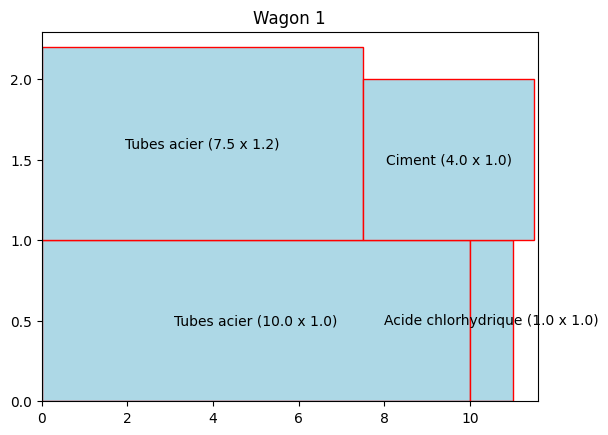

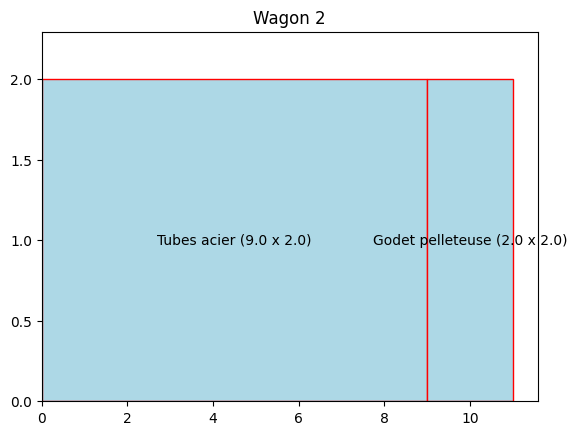

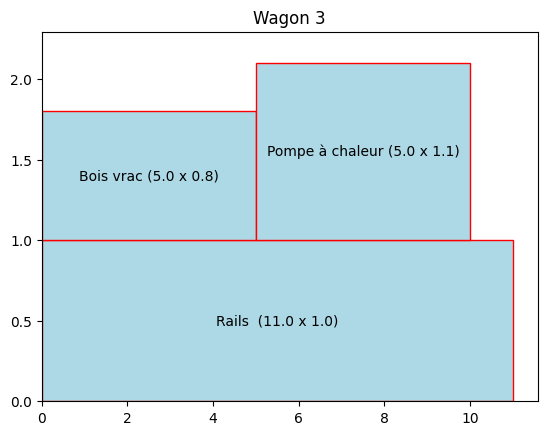

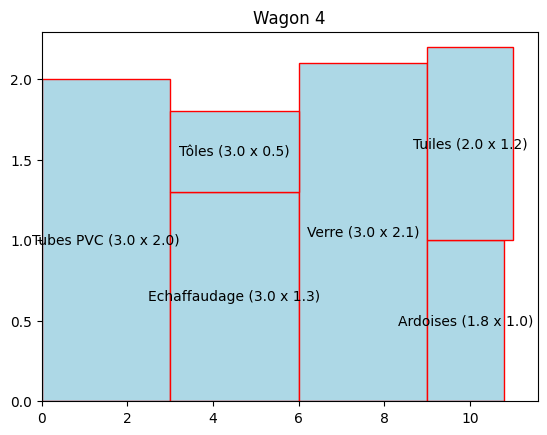

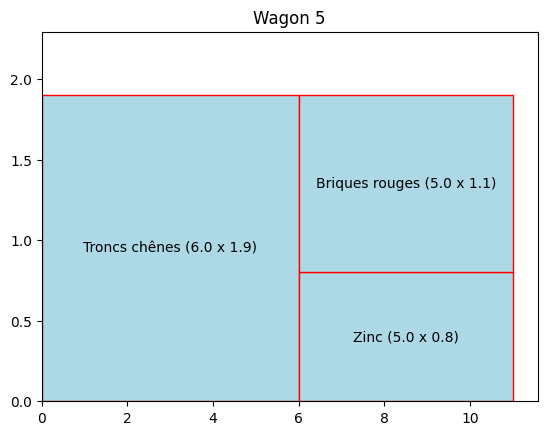

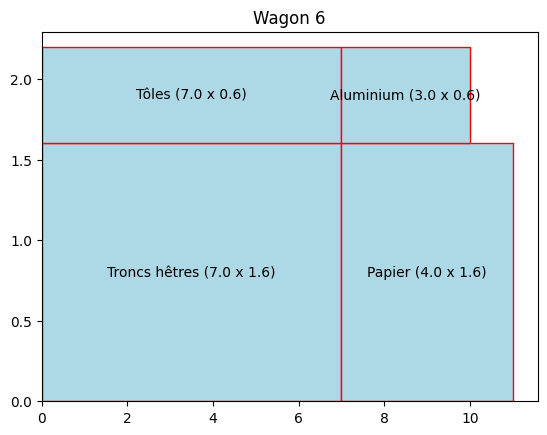

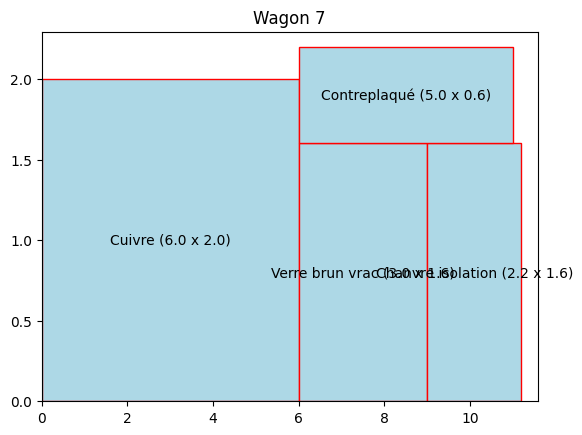

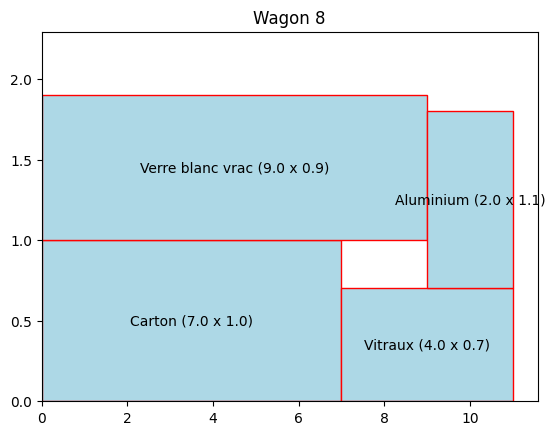

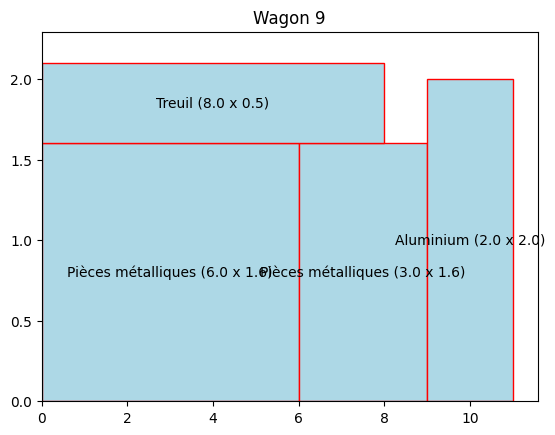

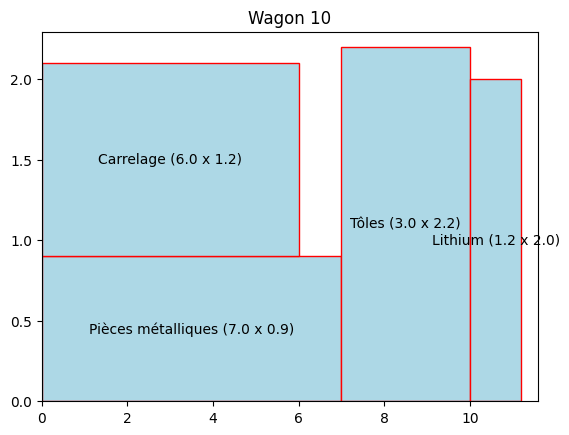

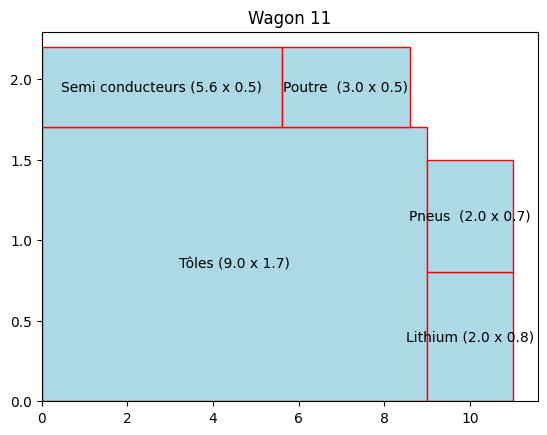

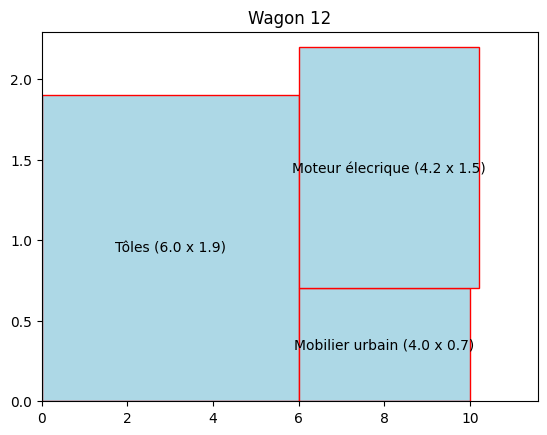

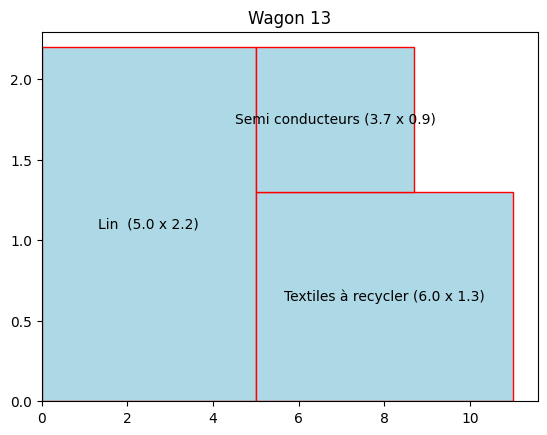

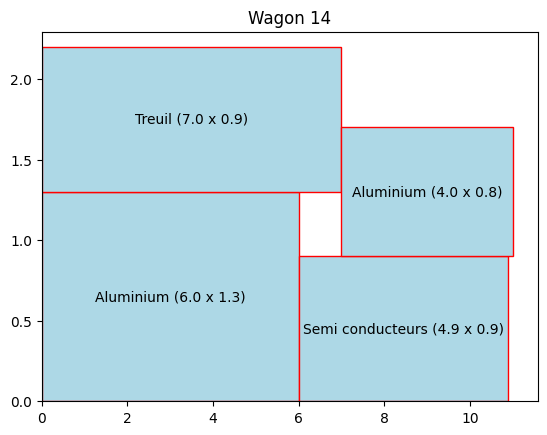

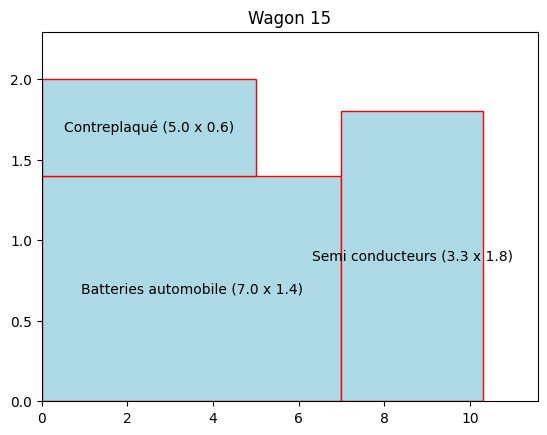

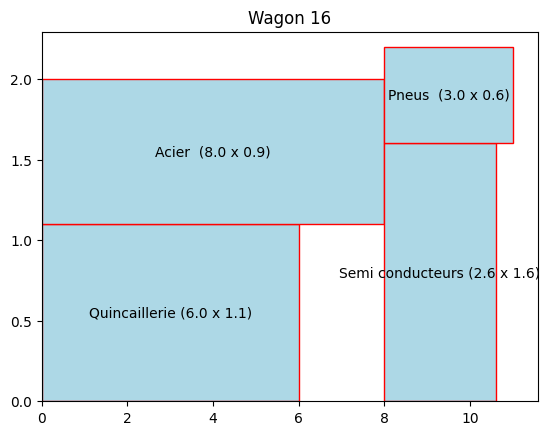

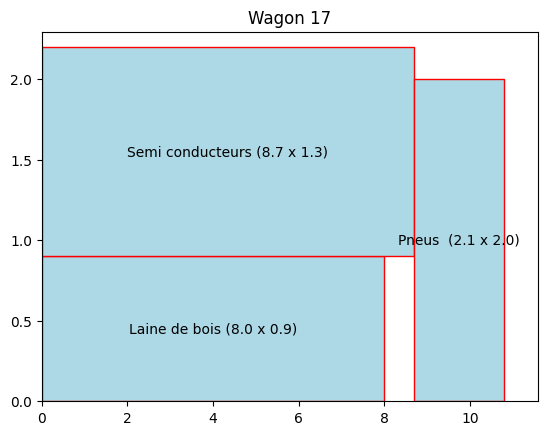

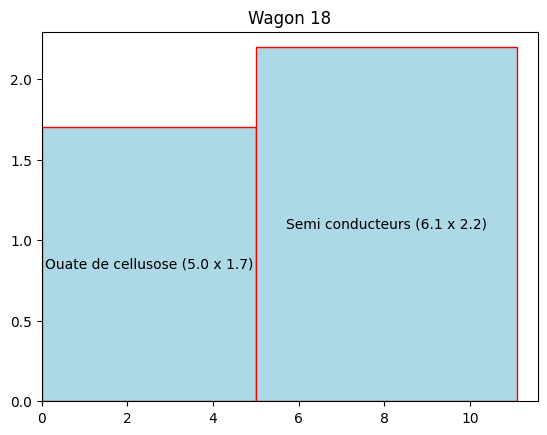

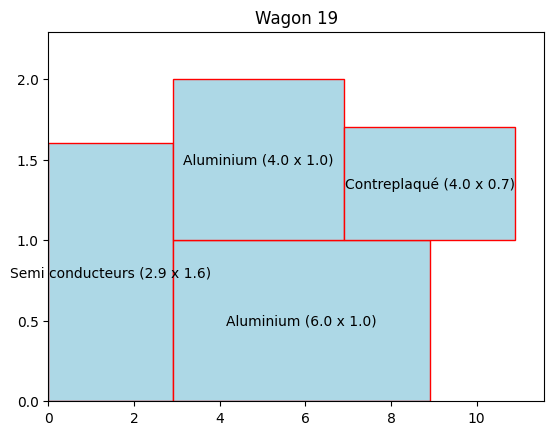

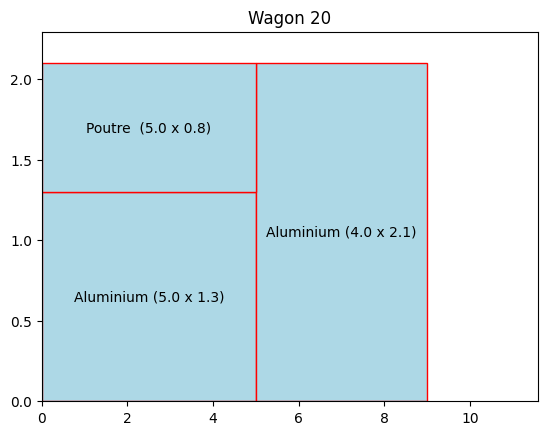

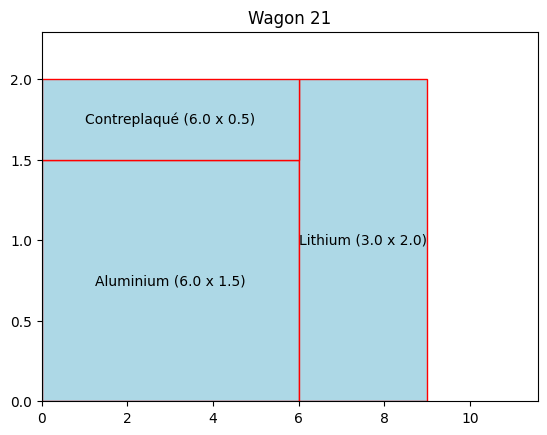

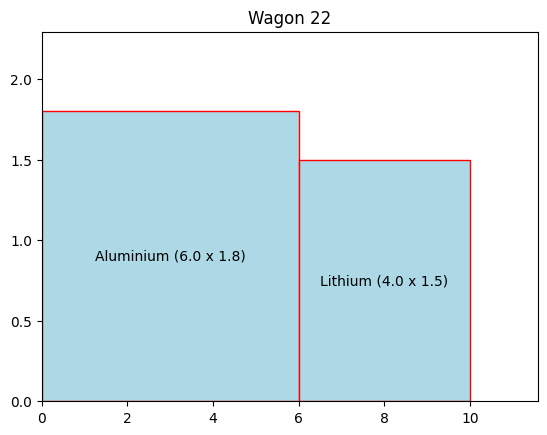

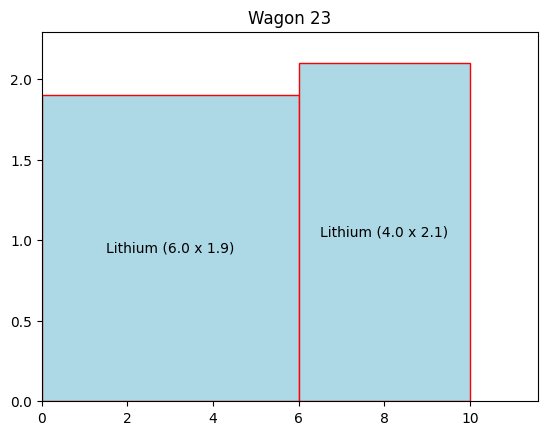

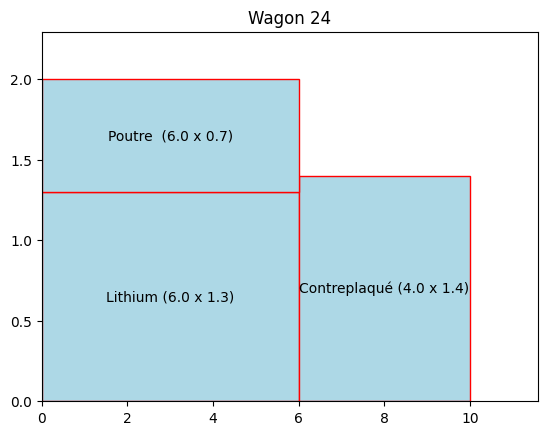

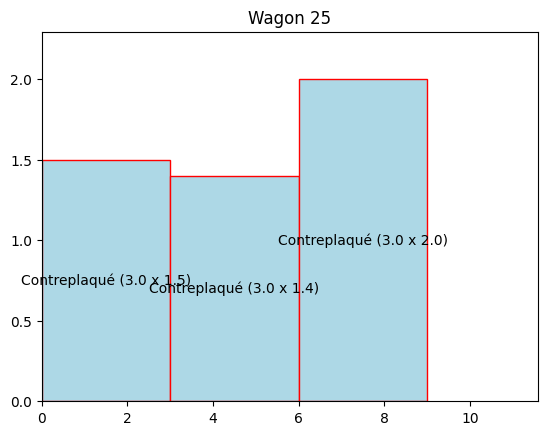

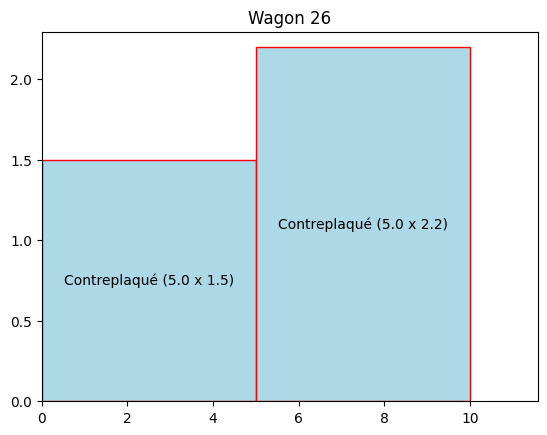

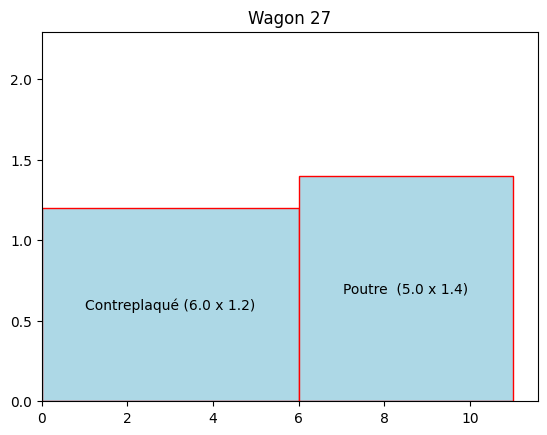

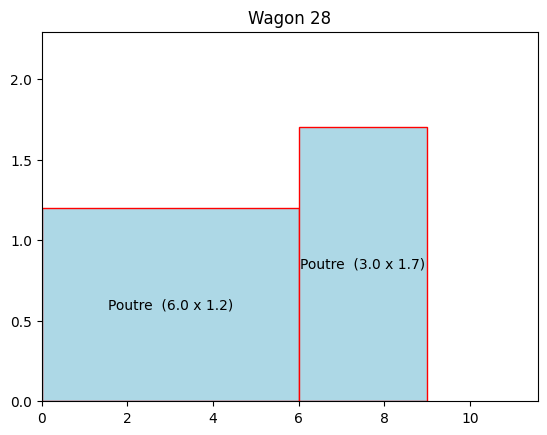

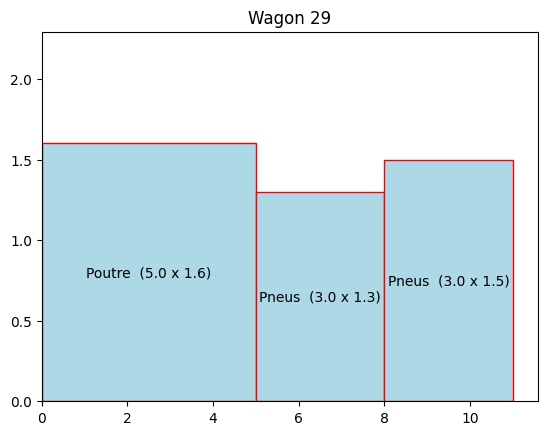

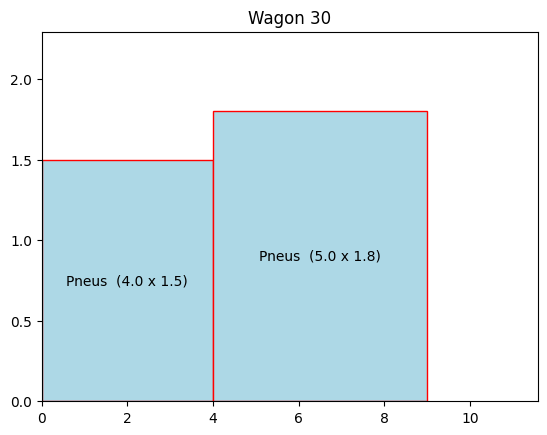

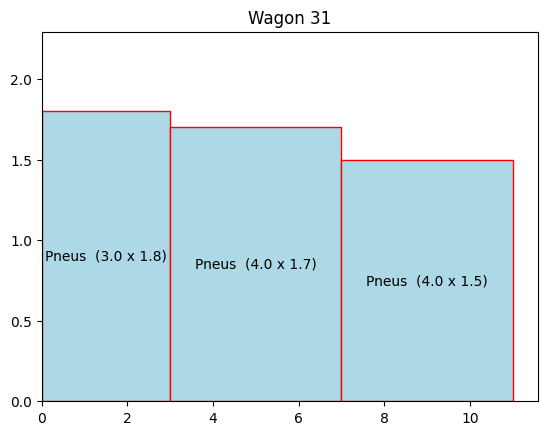

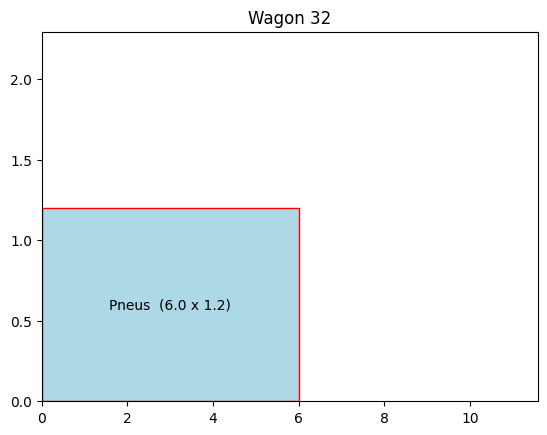

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import time

def load_data(path):
    data = pd.read_excel(path)
    return data

def get_items(data):
    items = []
    for index, row in data.iterrows():
        name = row['Désignation']
        length = row['Longueur']
        width = row['Largeur']
        items.append((name, max(length, width), min(length, width)))  # Keep items in the order they appear
    return items

def pack_items(items, wagon_dimensions):
    wagons = []
    for name, length, width in items:
        placed = False
        for wagon in wagons:
            if try_place_item(wagon, name, length, width, wagon_dimensions):
                placed = True
                break
            elif try_place_item(wagon, name, width, length, wagon_dimensions):  # Try rotating the item
                placed = True
                break
        if not placed:
            wagons.append(create_new_wagon(name, length, width, wagon_dimensions))
    return wagons

def create_new_wagon(name, length, width, dimensions):
    wagon = {'contents': [], 'free_spaces': [(0, 0, dimensions[0], dimensions[1])]}
    try_place_item(wagon, name, length, width, dimensions)
    return wagon

def try_place_item(wagon, name, length, width, dimensions):
    for i, (x, y, w, h) in enumerate(wagon['free_spaces']):
        if length <= w and width <= h:
            wagon['contents'].append((name, length, width, x, y))
            update_free_spaces(wagon, length, width, x, y, dimensions)
            return True
    return False

def update_free_spaces(wagon, length, width, x, y, dimensions):
    new_spaces = []
    for sx, sy, sw, sh in wagon['free_spaces']:
        if not (x + length <= sx or x >= sx + sw or y + width <= sy or y >= sy + sh):
            # Divide the space around the new item
            if x > sx:
                new_spaces.append((sx, sy, x - sx, sh))
            if x + length < sx + sw:
                new_spaces.append((x + length, sy, sx + sw - (x + length), sh))
            if y > sy:
                new_spaces.append((sx, sy, sw, y - sy))
            if y + width < sy + sh:
                new_spaces.append((sx, y + width, sw, sy + sh - (y + width)))
        else:
            new_spaces.append((sx, sy, sw, sh))
    wagon['free_spaces'] = [space for space in new_spaces if space[2] > 0 and space[3] > 0]  # Filter out non-positive spaces

def convert_to_json(wagons):
    structure = {}
    for i, wagon in enumerate(wagons):
        wagon_name = f"Wagon {i+1}"
        structure[wagon_name] = {}
        for j, (name, length, width, x, y) in enumerate(wagon['contents']):
            object_name = f"Objet {j+1}"
            structure[wagon_name][object_name] = {
                "longueur": length,
                "largeur": width,
                "designation": name,
                "position_x": x,
                "position_y": y
            }
    return {"d2": {"Online_FF": {"structure": structure}}}

def plot_wagons(wagons, wagon_dimensions):
    for i, wagon in enumerate(wagons):
        fig, ax = plt.subplots()
        ax.set_title(f'Wagon {i+1}')
        ax.set_xlim(0, wagon_dimensions[0])
        ax.set_ylim(0, wagon_dimensions[1])
        for name, length, width, x, y in wagon['contents']:
            rect = patches.Rectangle((x, y), length, width, linewidth=1, edgecolor='r', facecolor='lightblue')
            ax.add_patch(rect)
            label = f'{name} ({length} x {width})'
            ax.text(x + length/2, y + width/2, label, color='black', ha='center', va='center')
        ax.set_aspect('auto')
        plt.show()

if __name__ == "__main__":
    chemin_fichier = 'donnees_marchandise.xlsx'
    data = load_data(chemin_fichier)
    items = get_items(data)
    wagon_dimensions = (11.583, 2.294)  # Length x Width
    start_time = time.time()
    wagons = pack_items(items, wagon_dimensions)
    stop_time = time.time()
    print(f'Time taken: {stop_time - start_time} seconds')
    print(f'Total wagons used: {len(wagons)}')
    
    # Convert to JSON and print
    json_structure = convert_to_json(wagons)
    with open('2D_online_francois.json', 'w') as json_file:
        json.dump(json_structure, json_file, indent=4)
    
    plot_wagons(wagons, wagon_dimensions)

### Offline

Elapsed time: 0.0 seconds
Total wagons used: 29
Contents of Wagon 1:
Item: Tubes acier, Width: 9.0, Length: 2.0, Rotated: False, X: 0, Y: 0
Item: Pneus , Width: 2.0, Length: 2.1, Rotated: False, X: 9.0, Y: 0


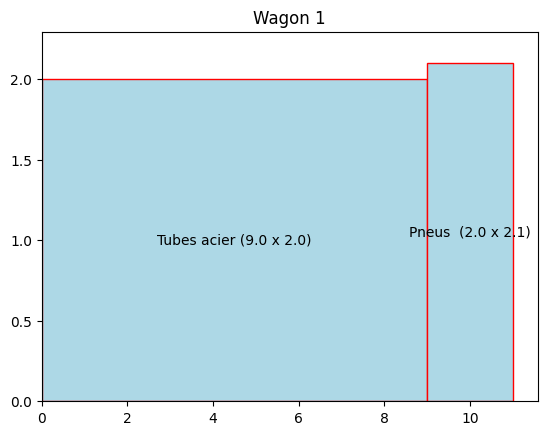

Contents of Wagon 2:
Item: Tôles, Width: 9.0, Length: 1.7, Rotated: True, X: 0, Y: 0
Item: Godet pelleteuse, Width: 2.0, Length: 2.0, Rotated: False, X: 9.0, Y: 0
Item: Treuil, Width: 8.0, Length: 0.5, Rotated: False, X: 0, Y: 1.7


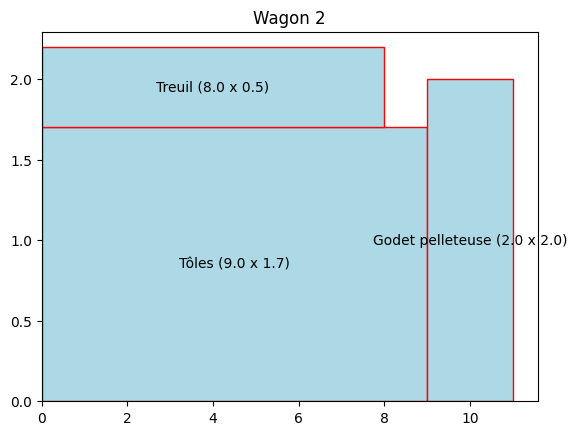

Contents of Wagon 3:
Item: Semi conducteurs, Width: 6.1, Length: 2.2, Rotated: True, X: 0, Y: 0
Item: Lin , Width: 5.0, Length: 2.2, Rotated: False, X: 6.1, Y: 0


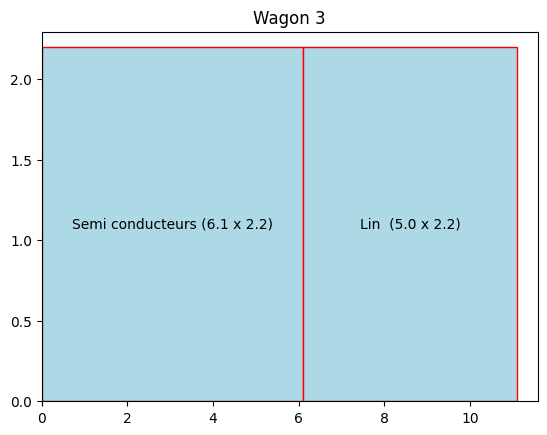

Contents of Wagon 4:
Item: Cuivre, Width: 6.0, Length: 2.0, Rotated: True, X: 0, Y: 0
Item: Contreplaqué, Width: 5.0, Length: 2.2, Rotated: False, X: 6.0, Y: 0


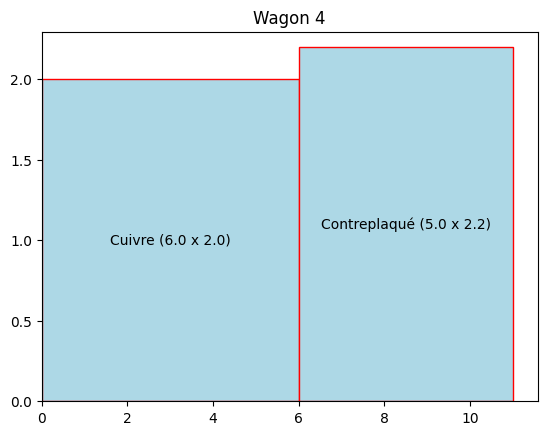

Contents of Wagon 5:
Item: Troncs chênes, Width: 6.0, Length: 1.9, Rotated: True, X: 0, Y: 0
Item: Pneus , Width: 5.0, Length: 1.8, Rotated: False, X: 6.0, Y: 0


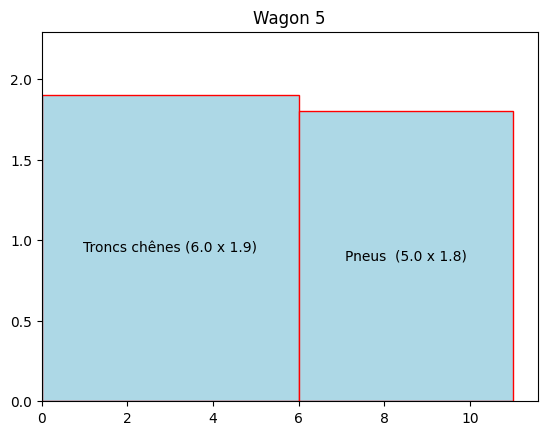

Contents of Wagon 6:
Item: Tôles, Width: 6.0, Length: 1.9, Rotated: True, X: 0, Y: 0
Item: Ouate de cellusose, Width: 5.0, Length: 1.7, Rotated: False, X: 6.0, Y: 0
Item: Tôles, Width: 3.0, Length: 0.5, Rotated: False, X: 6.0, Y: 1.7


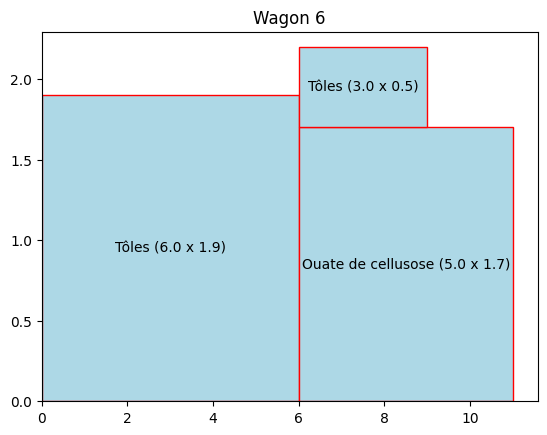

Contents of Wagon 7:
Item: Lithium, Width: 6.0, Length: 1.9, Rotated: True, X: 0, Y: 0
Item: Aluminium, Width: 4.0, Length: 2.1, Rotated: False, X: 6.0, Y: 0
Item: Tuiles, Width: 1.2, Length: 2.0, Rotated: True, X: 10.0, Y: 0


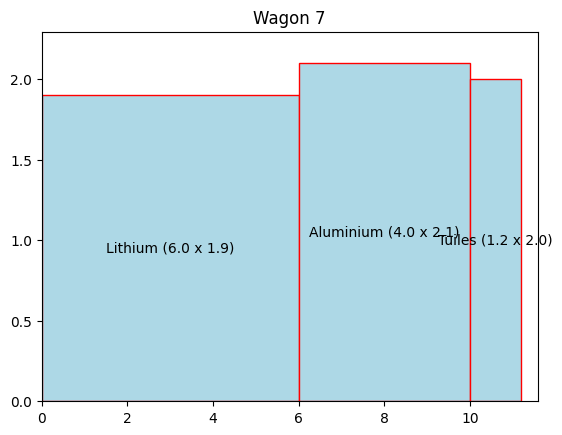

Contents of Wagon 8:
Item: Semi conducteurs, Width: 8.7, Length: 1.3, Rotated: True, X: 0, Y: 0
Item: Verre blanc vrac, Width: 9.0, Length: 0.9, Rotated: False, X: 0, Y: 1.3
Item: Aluminium, Width: 2.0, Length: 2.0, Rotated: False, X: 9.0, Y: 0


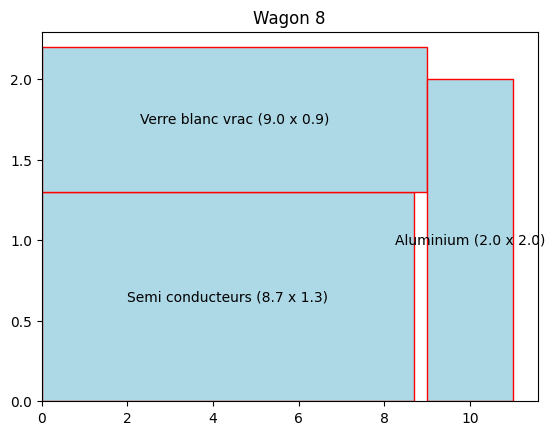

Contents of Wagon 9:
Item: Troncs hêtres, Width: 7.0, Length: 1.6, Rotated: True, X: 0, Y: 0
Item: Lithium, Width: 4.0, Length: 2.1, Rotated: False, X: 7.0, Y: 0
Item: Tôles, Width: 7.0, Length: 0.6, Rotated: False, X: 0, Y: 1.6


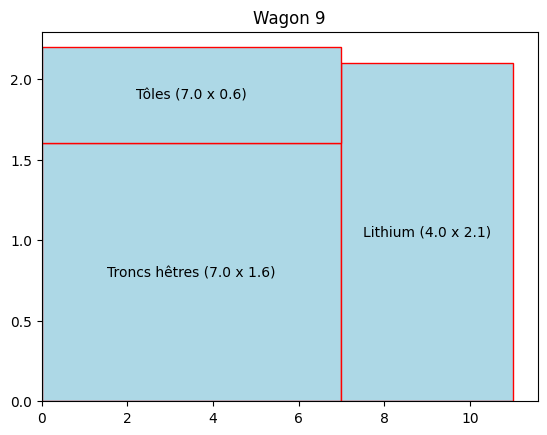

Contents of Wagon 10:
Item: Rails , Width: 11.0, Length: 1.0, Rotated: True, X: 0, Y: 0
Item: Tubes acier, Width: 10.0, Length: 1.0, Rotated: False, X: 0, Y: 1.0
Item: Acide chlorhydrique, Width: 1.0, Length: 1.0, Rotated: False, X: 10.0, Y: 1.0


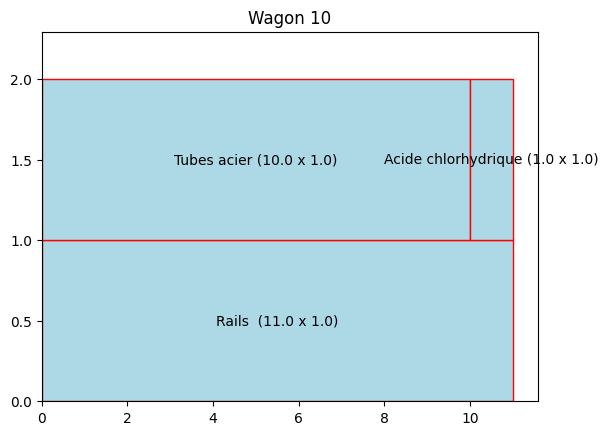

Contents of Wagon 11:
Item: Aluminium, Width: 6.0, Length: 1.8, Rotated: True, X: 0, Y: 0
Item: Poutre , Width: 5.0, Length: 1.6, Rotated: False, X: 6.0, Y: 0
Item: Contreplaqué, Width: 5.0, Length: 0.6, Rotated: False, X: 6.0, Y: 1.6


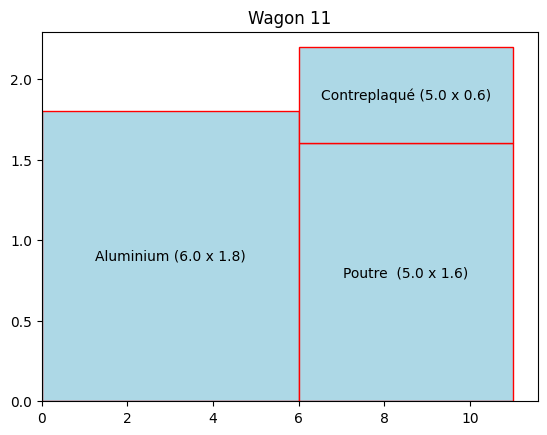

Contents of Wagon 12:
Item: Batteries automobile, Width: 7.0, Length: 1.4, Rotated: True, X: 0, Y: 0
Item: Pneus , Width: 4.0, Length: 1.7, Rotated: False, X: 7.0, Y: 0
Item: Poutre , Width: 6.0, Length: 0.7, Rotated: False, X: 0, Y: 1.4
Item: Poutre , Width: 3.0, Length: 0.5, Rotated: False, X: 7.0, Y: 1.7


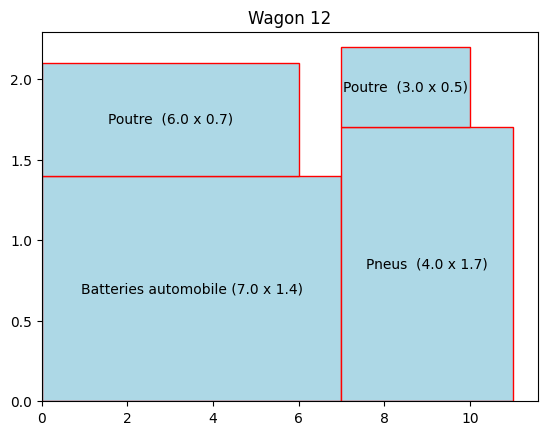

Contents of Wagon 13:
Item: Pièces métalliques, Width: 6.0, Length: 1.6, Rotated: True, X: 0, Y: 0
Item: Contreplaqué, Width: 5.0, Length: 1.5, Rotated: False, X: 6.0, Y: 0
Item: Contreplaqué, Width: 5.0, Length: 0.6, Rotated: False, X: 6.0, Y: 1.5
Item: Contreplaqué, Width: 6.0, Length: 0.5, Rotated: False, X: 0, Y: 1.6


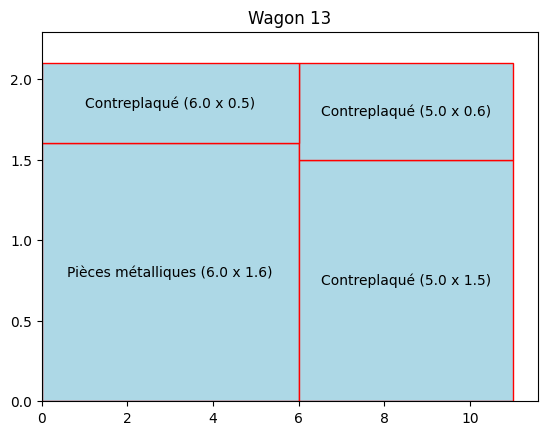

Contents of Wagon 14:
Item: Tubes acier, Width: 7.5, Length: 1.2, Rotated: True, X: 0, Y: 0
Item: Acier , Width: 8.0, Length: 0.9, Rotated: False, X: 0, Y: 1.2
Item: Tôles, Width: 3.0, Length: 2.2, Rotated: False, X: 8.0, Y: 0


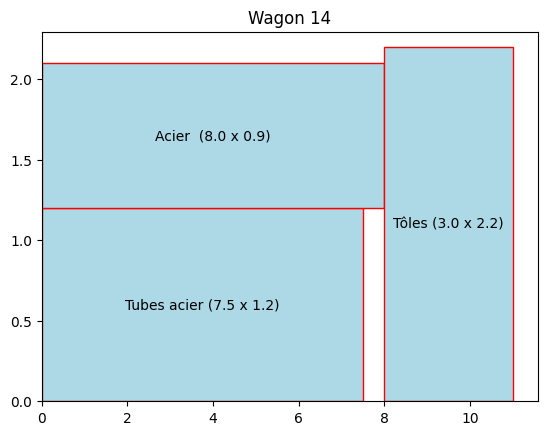

Contents of Wagon 15:
Item: Aluminium, Width: 6.0, Length: 1.5, Rotated: True, X: 0, Y: 0
Item: Poutre , Width: 5.0, Length: 1.4, Rotated: False, X: 6.0, Y: 0
Item: Bois vrac, Width: 5.0, Length: 0.8, Rotated: False, X: 6.0, Y: 1.4
Item: Vitraux, Width: 4.0, Length: 0.7, Rotated: False, X: 0, Y: 1.5
Item: Pneus , Width: 2.0, Length: 0.7, Rotated: False, X: 4.0, Y: 1.5


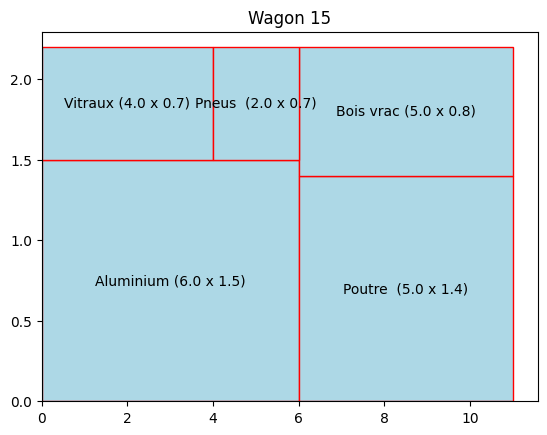

Contents of Wagon 16:
Item: Textiles à recycler, Width: 6.0, Length: 1.3, Rotated: True, X: 0, Y: 0
Item: Laine de bois, Width: 8.0, Length: 0.9, Rotated: False, X: 0, Y: 1.3
Item: Aluminium, Width: 5.0, Length: 1.3, Rotated: False, X: 6.0, Y: 0
Item: Aluminium, Width: 3.0, Length: 0.6, Rotated: False, X: 8.0, Y: 1.3


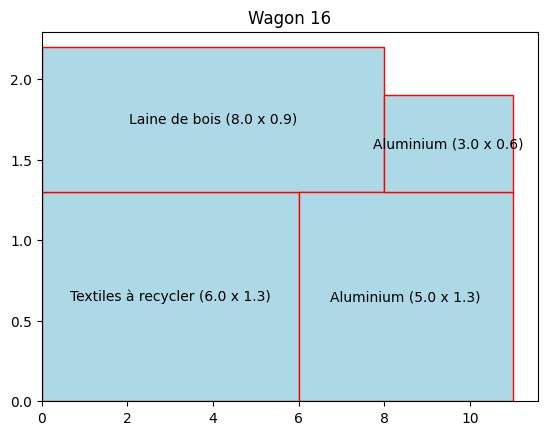

Contents of Wagon 17:
Item: Aluminium, Width: 6.0, Length: 1.3, Rotated: True, X: 0, Y: 0
Item: Papier, Width: 4.0, Length: 1.6, Rotated: False, X: 6.0, Y: 0
Item: Semi conducteurs, Width: 4.9, Length: 0.9, Rotated: False, X: 0, Y: 1.3
Item: Semi conducteurs, Width: 5.6, Length: 0.5, Rotated: False, X: 4.9, Y: 1.6
Item: Ardoises, Width: 1.0, Length: 1.8, Rotated: False, X: 10.5, Y: 0


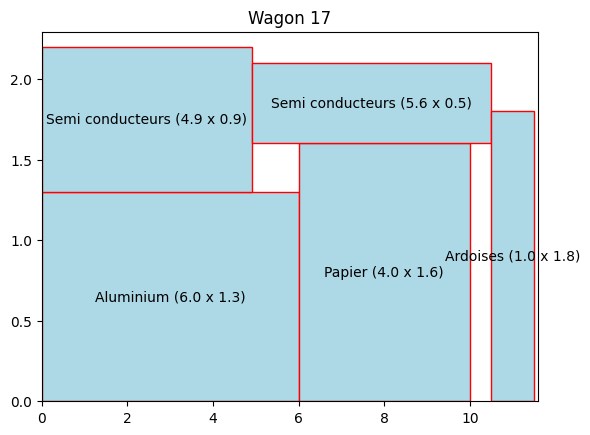

Contents of Wagon 18:
Item: Lithium, Width: 6.0, Length: 1.3, Rotated: True, X: 0, Y: 0
Item: Verre, Width: 3.0, Length: 2.1, Rotated: False, X: 6.0, Y: 0
Item: Zinc, Width: 5.0, Length: 0.8, Rotated: False, X: 0, Y: 1.3
Item: Chanvre isolation, Width: 1.6, Length: 2.2, Rotated: True, X: 9.0, Y: 0
Item: Lithium, Width: 0.8, Length: 2.0, Rotated: True, X: 10.6, Y: 0


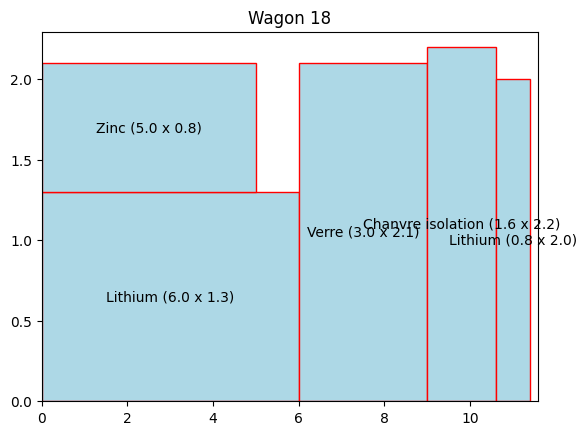

Contents of Wagon 19:
Item: Carrelage, Width: 6.0, Length: 1.2, Rotated: True, X: 0, Y: 0
Item: Carton, Width: 7.0, Length: 1.0, Rotated: False, X: 0, Y: 1.2
Item: Moteur élecrique, Width: 4.2, Length: 1.5, Rotated: False, X: 7.0, Y: 0
Item: Mobilier urbain, Width: 4.0, Length: 0.7, Rotated: False, X: 7.0, Y: 1.5


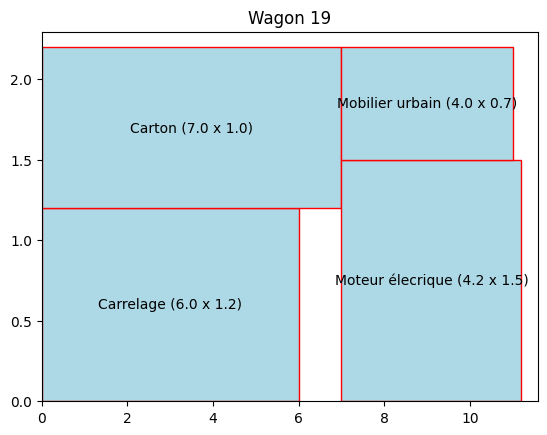

Contents of Wagon 20:
Item: Contreplaqué, Width: 6.0, Length: 1.2, Rotated: True, X: 0, Y: 0
Item: Pièces métalliques, Width: 7.0, Length: 0.9, Rotated: False, X: 0, Y: 1.2
Item: Tubes PVC, Width: 3.0, Length: 2.0, Rotated: False, X: 7.0, Y: 0
Item: Lithium, Width: 1.2, Length: 2.0, Rotated: True, X: 10.0, Y: 0


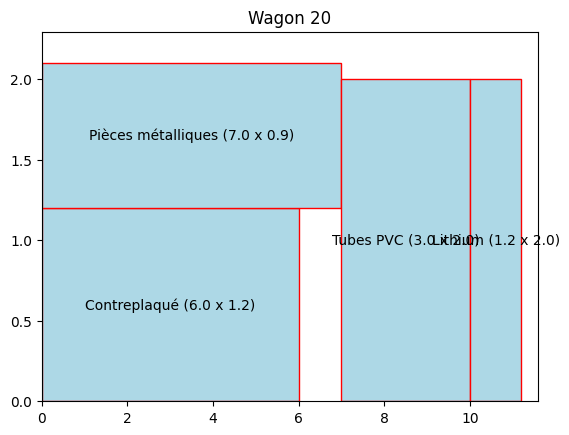

Contents of Wagon 21:
Item: Poutre , Width: 6.0, Length: 1.2, Rotated: True, X: 0, Y: 0
Item: Treuil, Width: 7.0, Length: 0.9, Rotated: False, X: 0, Y: 1.2
Item: Lithium, Width: 3.0, Length: 2.0, Rotated: False, X: 7.0, Y: 0
Item: Aluminium, Width: 1.1, Length: 2.0, Rotated: True, X: 10.0, Y: 0


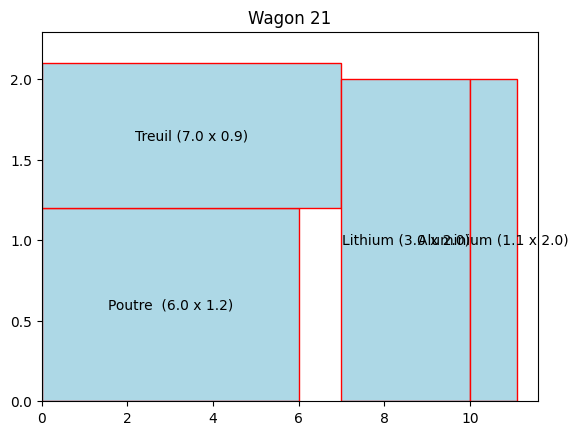

Contents of Wagon 22:
Item: Pneus , Width: 6.0, Length: 1.2, Rotated: True, X: 0, Y: 0
Item: Aluminium, Width: 6.0, Length: 1.0, Rotated: False, X: 0, Y: 1.2
Item: Lithium, Width: 4.0, Length: 1.5, Rotated: False, X: 6.0, Y: 0
Item: Contreplaqué, Width: 4.0, Length: 0.7, Rotated: False, X: 6.0, Y: 1.5


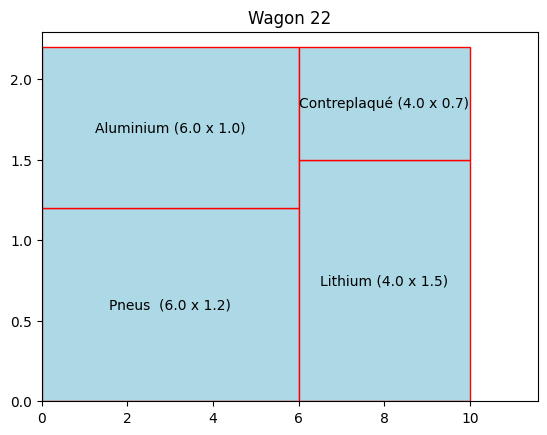

Contents of Wagon 23:
Item: Quincaillerie, Width: 6.0, Length: 1.1, Rotated: True, X: 0, Y: 0
Item: Contreplaqué, Width: 3.0, Length: 2.0, Rotated: False, X: 6.0, Y: 0
Item: Pompe à chaleur, Width: 5.0, Length: 1.1, Rotated: False, X: 0, Y: 1.1


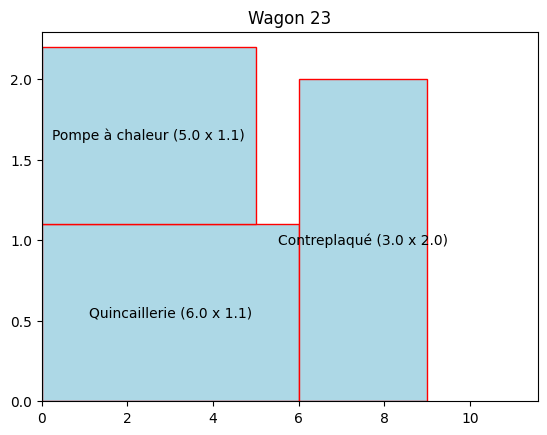

Contents of Wagon 24:
Item: Pneus , Width: 4.0, Length: 1.5, Rotated: True, X: 0, Y: 0
Item: Pneus , Width: 4.0, Length: 1.5, Rotated: False, X: 4.0, Y: 0
Item: Semi conducteurs, Width: 3.3, Length: 1.8, Rotated: False, X: 8.0, Y: 0
Item: Pneus , Width: 3.0, Length: 0.6, Rotated: False, X: 4.0, Y: 1.5


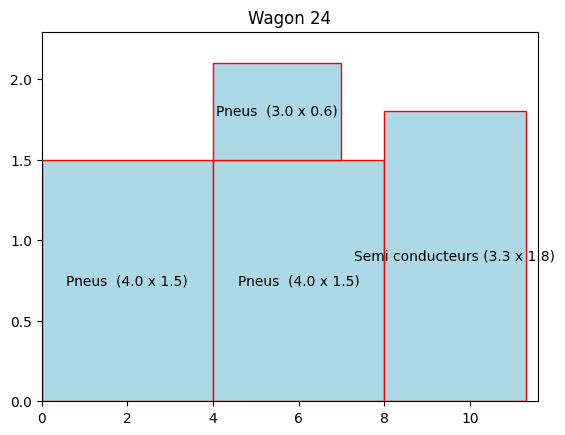

Contents of Wagon 25:
Item: Contreplaqué, Width: 4.0, Length: 1.4, Rotated: True, X: 0, Y: 0
Item: Briques rouges, Width: 5.0, Length: 1.1, Rotated: False, X: 4.0, Y: 0
Item: Ciment, Width: 4.0, Length: 1.0, Rotated: False, X: 4.0, Y: 1.1
Item: Aluminium, Width: 4.0, Length: 0.8, Rotated: False, X: 0, Y: 1.4


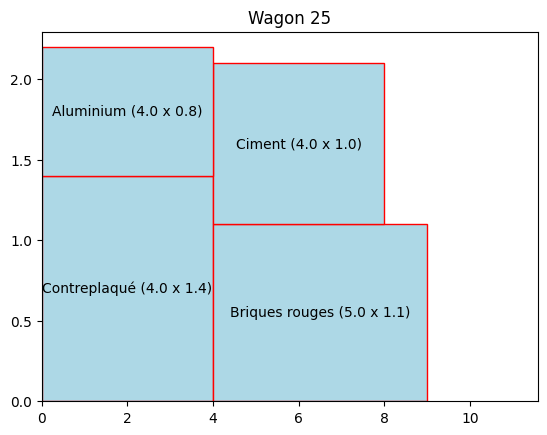

Contents of Wagon 26:
Item: Pneus , Width: 3.0, Length: 1.8, Rotated: True, X: 0, Y: 0
Item: Poutre , Width: 3.0, Length: 1.7, Rotated: False, X: 3.0, Y: 0
Item: Verre brun vrac, Width: 3.0, Length: 1.6, Rotated: False, X: 6.0, Y: 0


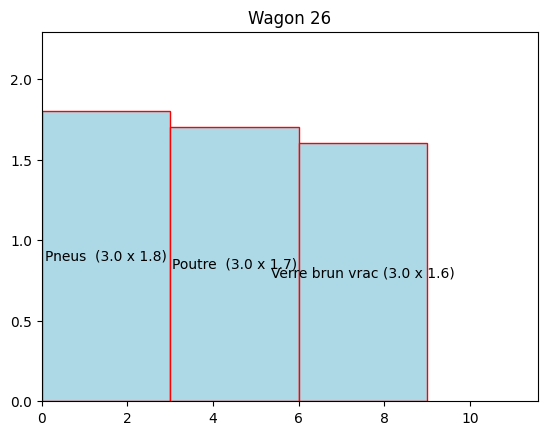

Contents of Wagon 27:
Item: Pièces métalliques, Width: 3.0, Length: 1.6, Rotated: True, X: 0, Y: 0
Item: Semi conducteurs, Width: 2.9, Length: 1.6, Rotated: False, X: 3.0, Y: 0
Item: Contreplaqué, Width: 3.0, Length: 1.5, Rotated: False, X: 5.9, Y: 0
Item: Semi conducteurs, Width: 2.6, Length: 1.6, Rotated: False, X: 8.9, Y: 0


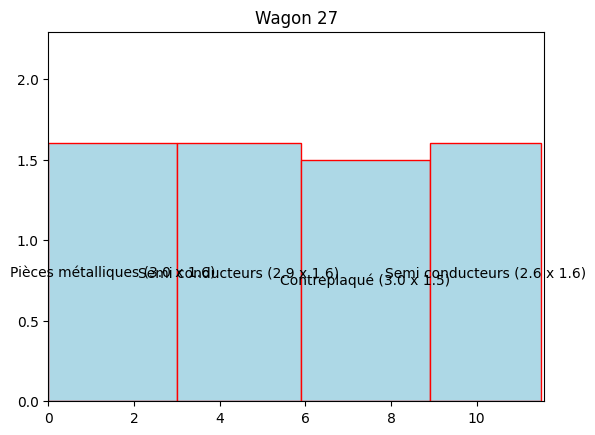

Contents of Wagon 28:
Item: Pneus , Width: 3.0, Length: 1.5, Rotated: True, X: 0, Y: 0
Item: Contreplaqué, Width: 3.0, Length: 1.4, Rotated: False, X: 3.0, Y: 0
Item: Aluminium, Width: 4.0, Length: 1.0, Rotated: False, X: 6.0, Y: 0
Item: Poutre , Width: 5.0, Length: 0.8, Rotated: False, X: 6.0, Y: 1.0


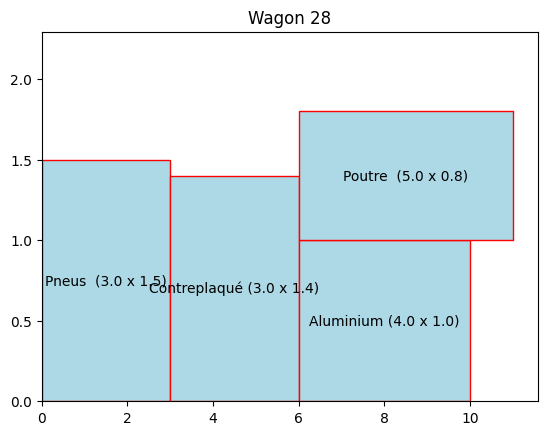

Contents of Wagon 29:
Item: Echaffaudage, Width: 3.0, Length: 1.3, Rotated: True, X: 0, Y: 0
Item: Pneus , Width: 3.0, Length: 1.3, Rotated: False, X: 3.0, Y: 0
Item: Semi conducteurs, Width: 3.7, Length: 0.9, Rotated: False, X: 6.0, Y: 0


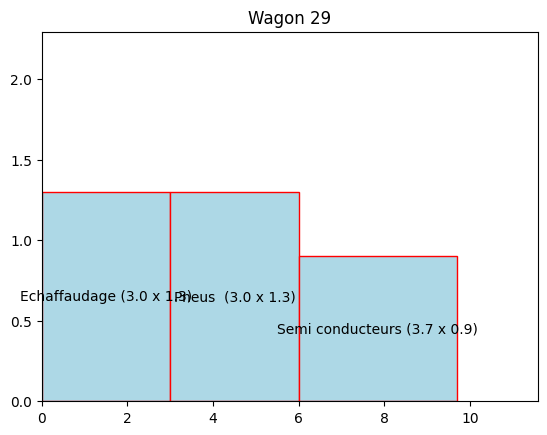

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import time

def load_data(path):
    data = pd.read_excel(path)
    return data

def check_and_rotate_items(data):
    items = []
    for index, row in data.iterrows():
        name = row['Désignation']
        length = row['Longueur']
        width = row['Largeur']
        area = length * width
        if length > width:
            if width <= 2.294:
                items.append((name, width, length, True, area))  # Rotated
            else:
                items.append((name, length, width, False, area))
        else:
            items.append((name, length, width, False, area))
    return sorted(items, key=lambda x: x[4], reverse=True)

def pack_items(items, wagon_dimensions):
    wagons = [{'free_spaces': [(0, 0, wagon_dimensions[0], wagon_dimensions[1])], 'contents': []}]
    for item in items:
        name, width, length, rotated, _ = item
        placed = False
        for wagon in wagons:
            for space in wagon['free_spaces']:
                space_x, space_y, space_width, space_height = space
                # Try to fit item without rotation
                if width <= space_width and length <= space_height:
                    wagon['contents'].append((name, width, length, rotated, space_x, space_y))
                    update_free_spaces(wagon, width, length, space_x, space_y)
                    placed = True
                    break
                # Try to fit item with rotation
                elif length <= space_width and width <= space_height:
                    # Notice here that when rotated, dimensions are swapped for fitting purposes
                    wagon['contents'].append((name, length, width, not rotated, space_x, space_y))
                    update_free_spaces(wagon, length, width, space_x, space_y)
                    placed = True
                    break
            if placed:
                break
        if not placed:
            new_wagon = {'free_spaces': [(0, 0, wagon_dimensions[0], wagon_dimensions[1])], 'contents': []}
            wagons.append(new_wagon)
            if rotated:
                wagons[-1]['contents'].append((name, length, width, rotated, 0, 0))
                update_free_spaces(wagons[-1], length, width, 0, 0)
            else:
                wagons[-1]['contents'].append((name, width, length, rotated, 0, 0))
                update_free_spaces(wagons[-1], width, length, 0, 0)
    return wagons

def update_free_spaces(wagon, item_width, item_length, item_x, item_y):
    new_spaces = []
    for space in wagon['free_spaces']:
        space_x, space_y, space_width, space_height = space
        if not (item_x + item_width <= space_x or item_x >= space_x + space_width or 
                item_y + item_length <= space_y or item_y >= space_y + space_height):
            if item_x > space_x:
                new_spaces.append((space_x, space_y, item_x - space_x, space_height))
            if item_x + item_width < space_x + space_width:
                new_spaces.append((item_x + item_width, space_y, space_x + space_width - (item_x + item_width), space_height))
            if item_y > space_y:
                new_spaces.append((space_x, space_y, space_width, item_y - space_y))
            if item_y + item_length < space_y + space_height:
                new_spaces.append((space_x, item_y + item_length, space_width, space_y + space_height - (item_y + item_length)))
        else:
            new_spaces.append(space)
    wagon['free_spaces'] = new_spaces

def convert_to_json(wagons):
    structure = {}
    for i, wagon in enumerate(wagons):
        wagon_name = f"Wagon {i+1}"
        structure[wagon_name] = {}
        for j, (name, width, length, rotated, x, y) in enumerate(wagon['contents']):
            object_name = f"Objet {j+1}"
            structure[wagon_name][object_name] = {
                "largeur": length,
                "longueur": width,
                "designation": name,
                "position_x": x,
                "position_y": y
            }
    return {"d2": {"Offline_FF": {"structure": structure}}}

def plot_wagons(wagons, wagon_dimensions):
    for i, wagon in enumerate(wagons):
        fig, ax = plt.subplots()
        ax.set_title(f'Wagon {i+1}')
        ax.set_xlim(0, wagon_dimensions[0])
        ax.set_ylim(0, wagon_dimensions[1])

        # Debugging: Output the contents being plotted
        print(f"Contents of Wagon {i+1}:")
        for name, width, length, rotated, x, y in wagon['contents']:
            print(f"Item: {name}, Width: {width}, Length: {length}, Rotated: {rotated}, X: {x}, Y: {y}")
            rect = patches.Rectangle((x, y), width, length, linewidth=1, edgecolor='r', facecolor='lightblue')
            ax.add_patch(rect)
            label = f'{name} ({width} x {length})'
            ax.text(x + width/2, y + length/2, label, color='black', ha='center', va='center')

        ax.set_aspect('auto')
        plt.show()

if __name__ == "__main__":
    chemin_fichier = 'donnees_marchandise.xlsx'
    data = load_data(chemin_fichier)
    items = check_and_rotate_items(data)
    wagon_dimensions = (11.583, 2.294)  # Length x Width
    time_start = time.time()
    wagons = pack_items(items, wagon_dimensions)
    time_end = time.time()
    print(f'Elapsed time: {time_end - time_start} seconds')
    print(f'Total wagons used: {len(wagons)}')
    
    # Convert to JSON and print
    json_structure = convert_to_json(wagons)
    with open('2D_offline_francois.json', 'w') as json_file:
        json.dump(json_structure, json_file, indent=4)
    
    plot_wagons(wagons, wagon_dimensions)

## d = 3

### Online

Temps d'exécution pour lire les marchandises: 0.0348 secondes
Marchandises lues depuis le fichier Excel:
ID: 1, Désignation: Tubes acier, Length: 10.0, Width: 1.0, Height: 0.5
ID: 2, Désignation: Tubes acier, Length: 9.0, Width: 2.0, Height: 0.7
ID: 3, Désignation: Tubes acier, Length: 7.5, Width: 1.2, Height: 0.4
ID: 4, Désignation: Acide chlorhydrique, Length: 1.0, Width: 1.0, Height: 1.0
ID: 5, Désignation: Godet pelleteuse, Length: 2.0, Width: 2.0, Height: 1.0
ID: 6, Désignation: Rails , Length: 11.0, Width: 1.0, Height: 0.2
ID: 7, Désignation: Tubes PVC, Length: 3.0, Width: 2.0, Height: 0.6
ID: 8, Désignation: Echaffaudage, Length: 3.0, Width: 1.3, Height: 1.8
ID: 9, Désignation: Verre, Length: 3.0, Width: 2.1, Height: 0.6
ID: 10, Désignation: Ciment, Length: 4.0, Width: 1.0, Height: 0.5
ID: 11, Désignation: Bois vrac, Length: 5.0, Width: 0.8, Height: 1.0
ID: 12, Désignation: Troncs chênes, Length: 6.0, Width: 1.9, Height: 1.0
ID: 13, Désignation: Troncs hêtres, Length: 7.0, Width

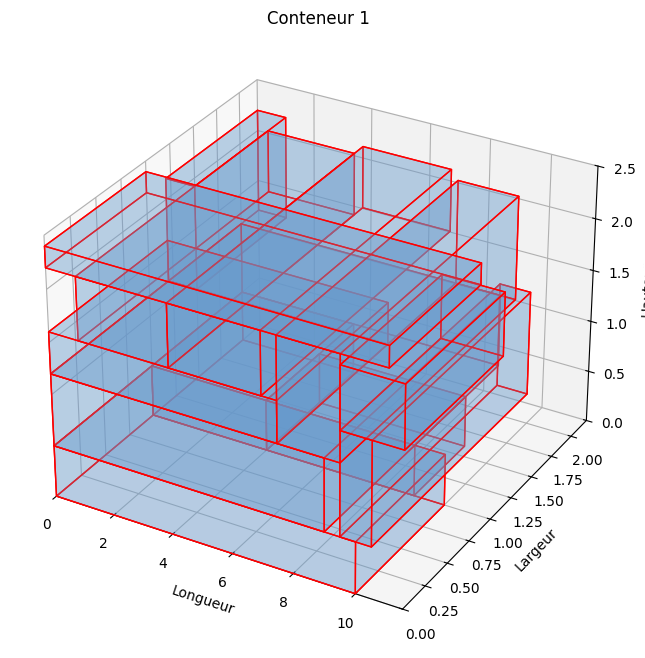


Conteneur 2:
Marchandise ID: 8, Désignation: Echaffaudage, Position: (0.0, 0.0, 0.0), Dimensions: (3.0, 1.3, 1.8)
Marchandise ID: 11, Désignation: Bois vrac, Position: (0.0, 1.3, 0.0), Dimensions: (5.0, 0.8, 1.0)
Marchandise ID: 12, Désignation: Troncs chênes, Position: (3.0, 0.0, 1.0), Dimensions: (6.0, 1.9, 1.0)
Marchandise ID: 16, Désignation: Zinc, Position: (3.0, 0.0, 0.0), Dimensions: (5.0, 0.8, 0.8)
Marchandise ID: 20, Désignation: Verre brun vrac, Position: (8.0, 0.0, 0.0), Dimensions: (3.0, 1.6, 0.9)
Marchandise ID: 41, Désignation: Treuil, Position: (0.0, 0.0, 2.0), Dimensions: (8.0, 0.5, 0.5)
Marchandise ID: 45, Désignation: Chanvre isolation, Position: (9.0, 0.0, 0.9), Dimensions: (2.2, 1.6, 1.1)
Marchandise ID: 56, Désignation: Aluminium, Position: (0.0, 1.3, 1.0), Dimensions: (3.0, 0.6, 1.2)
Marchandise ID: 76, Désignation: Contreplaqué, Position: (5.0, 1.6, 0.0), Dimensions: (6.0, 0.5, 0.7)
Marchandise ID: 97, Désignation: Pneus , Position: (3.0, 0.5, 2.0), Dimensions: 

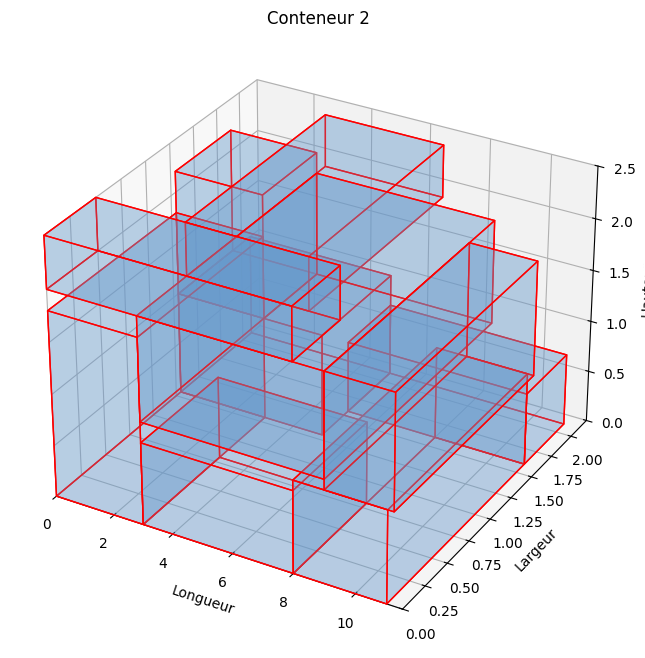


Conteneur 3:
Marchandise ID: 13, Désignation: Troncs hêtres, Position: (0.0, 0.0, 0.0), Dimensions: (7.0, 1.6, 1.5)
Marchandise ID: 17, Désignation: Papier, Position: (0.0, 0.0, 1.5), Dimensions: (4.0, 1.6, 0.6)
Marchandise ID: 24, Désignation: Pièces métalliques, Position: (7.0, 0.0, 0.0), Dimensions: (3.0, 1.6, 1.9)
Marchandise ID: 29, Désignation: Tôles, Position: (0.0, 1.6, 0.0), Dimensions: (7.0, 0.6, 1.5)
Marchandise ID: 33, Désignation: Tôles, Position: (7.0, 1.6, 0.0), Dimensions: (3.0, 0.5, 2.2)
Marchandise ID: 58, Désignation: Aluminium, Position: (4.0, 0.0, 1.9), Dimensions: (5.0, 1.3, 0.6)


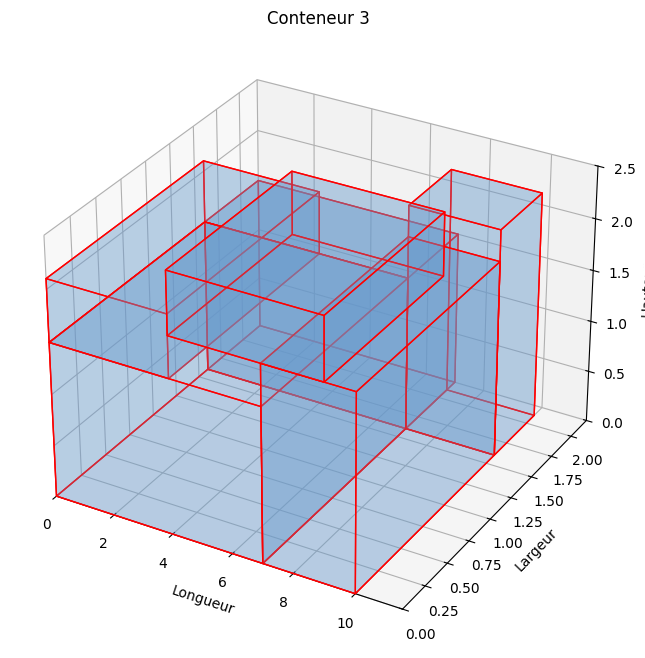


Conteneur 4:
Marchandise ID: 14, Désignation: Pompe à chaleur, Position: (0.0, 0.0, 0.0), Dimensions: (5.0, 1.1, 2.3)
Marchandise ID: 15, Désignation: Cuivre, Position: (5.0, 0.0, 0.0), Dimensions: (6.0, 2.0, 1.4)
Marchandise ID: 21, Désignation: Briques rouges, Position: (0.0, 1.1, 0.0), Dimensions: (5.0, 1.1, 2.4)
Marchandise ID: 35, Désignation: Lin , Position: (5.0, 0.0, 1.4), Dimensions: (5.0, 2.2, 0.7)


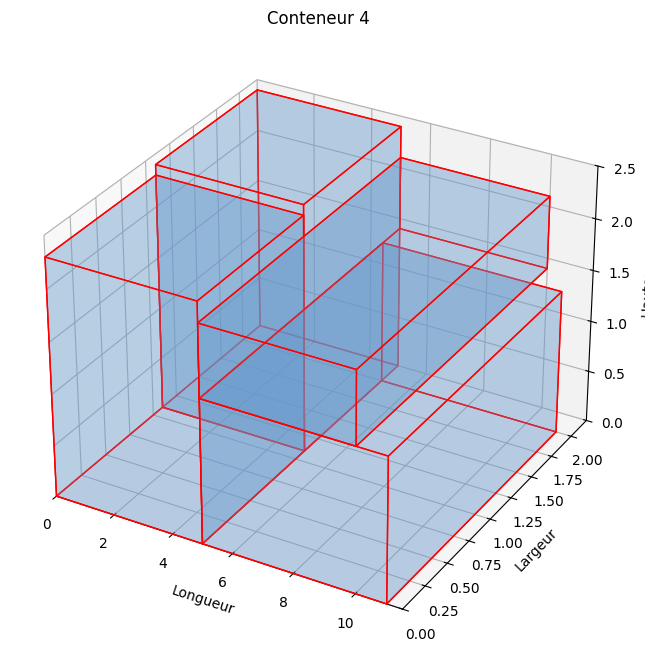


Conteneur 5:
Marchandise ID: 18, Désignation: Carton, Position: (0.0, 0.0, 0.0), Dimensions: (7.0, 1.0, 1.3)
Marchandise ID: 19, Désignation: Verre blanc vrac, Position: (0.0, 1.0, 0.0), Dimensions: (9.0, 0.9, 2.2)
Marchandise ID: 23, Désignation: Pièces métalliques, Position: (0.0, 0.0, 1.3), Dimensions: (7.0, 0.9, 1.2)
Marchandise ID: 26, Désignation: Tuiles, Position: (9.0, 0.0, 0.0), Dimensions: (2.0, 1.2, 2.3)
Marchandise ID: 71, Désignation: Lithium, Position: (7.0, 0.0, 0.0), Dimensions: (2.0, 0.8, 1.1)
Marchandise ID: 99, Désignation: Pneus , Position: (7.0, 0.0, 1.1), Dimensions: (2.0, 0.7, 1.1)


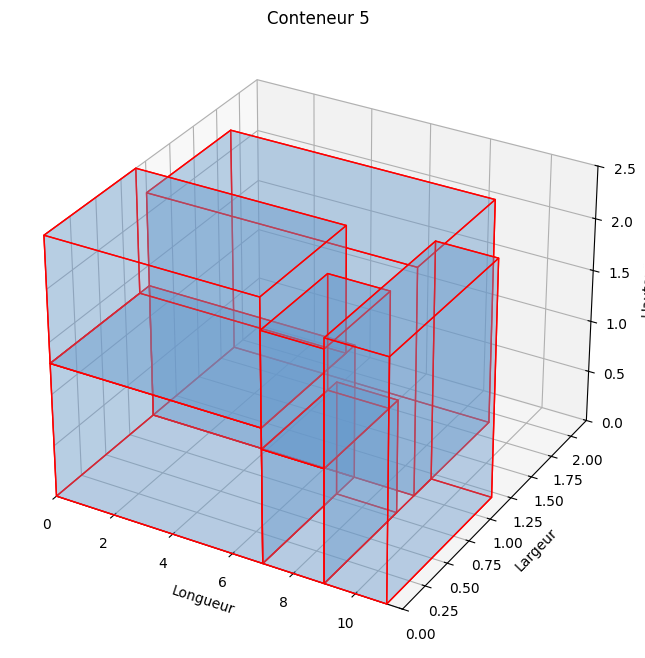


Conteneur 6:
Marchandise ID: 22, Désignation: Pièces métalliques, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.6, 1.4)
Marchandise ID: 27, Désignation: Vitraux, Position: (6.0, 0.0, 0.0), Dimensions: (4.0, 0.7, 1.2)
Marchandise ID: 30, Désignation: Tôles, Position: (0.0, 0.0, 1.4), Dimensions: (9.0, 1.7, 1.0)
Marchandise ID: 46, Désignation: Moteur élecrique, Position: (6.0, 0.7, 0.0), Dimensions: (4.2, 1.5, 0.8)
Marchandise ID: 48, Désignation: Semi conducteurs, Position: (0.0, 1.6, 0.0), Dimensions: (5.6, 0.5, 1.4)
Marchandise ID: 69, Désignation: Lithium, Position: (9.0, 0.7, 0.8), Dimensions: (2.0, 1.2, 1.5)


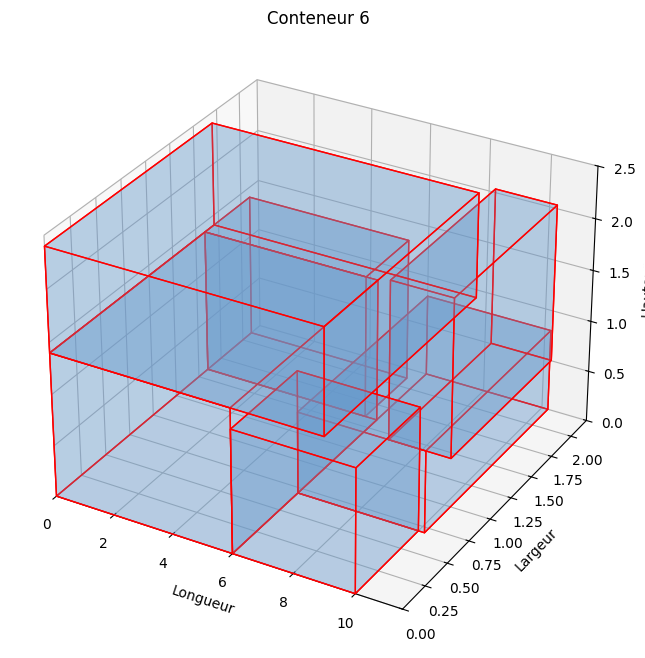


Conteneur 7:
Marchandise ID: 28, Désignation: Carrelage, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.2, 2.5)
Marchandise ID: 32, Désignation: Tôles, Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 2.2, 2.2)
Marchandise ID: 34, Désignation: Mobilier urbain, Position: (0.0, 1.2, 0.0), Dimensions: (4.0, 0.7, 1.9)
Marchandise ID: 62, Désignation: Aluminium, Position: (9.0, 0.0, 0.0), Dimensions: (2.0, 2.0, 2.3)


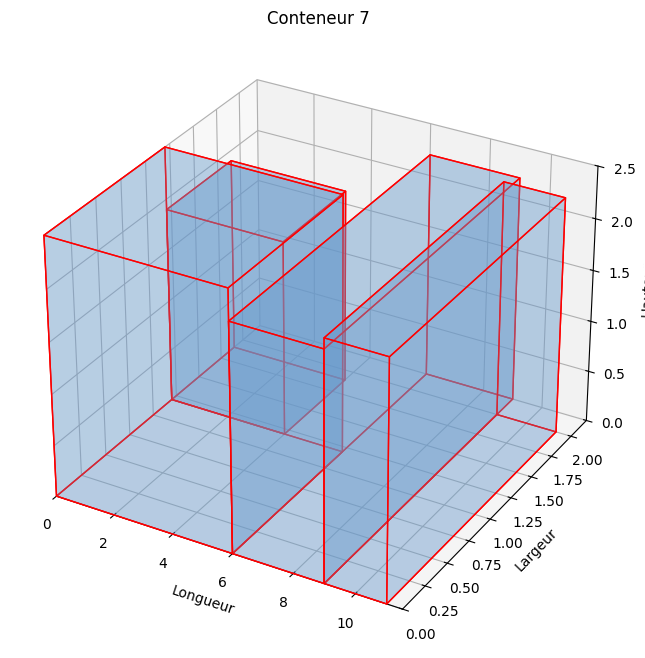


Conteneur 8:
Marchandise ID: 31, Désignation: Tôles, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.9, 1.6)
Marchandise ID: 44, Désignation: Ouate de cellusose, Position: (6.0, 0.0, 0.0), Dimensions: (5.0, 1.7, 1.2)
Marchandise ID: 57, Désignation: Aluminium, Position: (0.0, 0.0, 1.6), Dimensions: (6.0, 1.0, 0.8)
Marchandise ID: 63, Désignation: Aluminium, Position: (6.0, 0.0, 1.2), Dimensions: (4.0, 1.0, 1.1)
Marchandise ID: 83, Désignation: Poutre , Position: (0.0, 1.0, 1.6), Dimensions: (5.0, 0.8, 0.7)
Marchandise ID: 84, Désignation: Poutre , Position: (6.0, 1.7, 0.0), Dimensions: (3.0, 0.5, 1.9)
Marchandise ID: 86, Désignation: Poutre , Position: (5.0, 1.0, 1.6), Dimensions: (6.0, 0.7, 0.7)


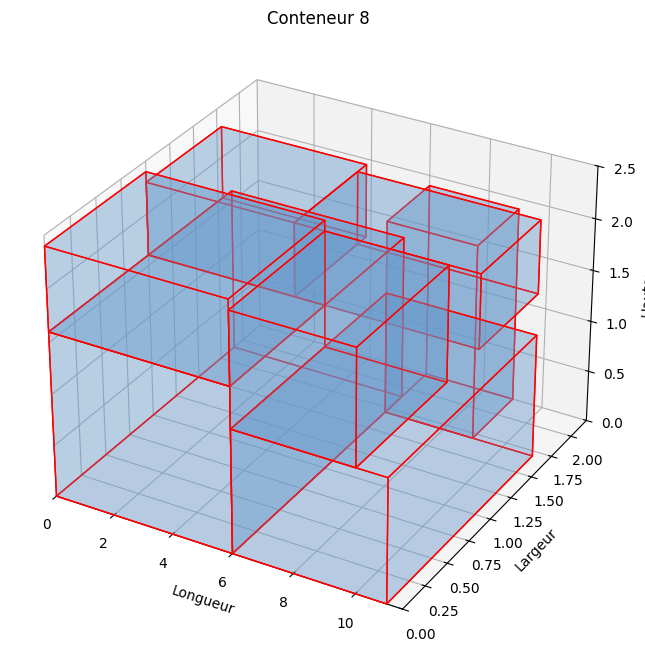


Conteneur 9:
Marchandise ID: 36, Désignation: Textiles à recycler, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.3, 2.5)
Marchandise ID: 40, Désignation: Treuil, Position: (0.0, 1.3, 0.0), Dimensions: (7.0, 0.9, 1.3)
Marchandise ID: 47, Désignation: Semi conducteurs, Position: (6.0, 0.0, 0.0), Dimensions: (3.7, 0.9, 1.4)
Marchandise ID: 61, Désignation: Aluminium, Position: (7.0, 0.9, 0.0), Dimensions: (4.0, 0.8, 2.1)


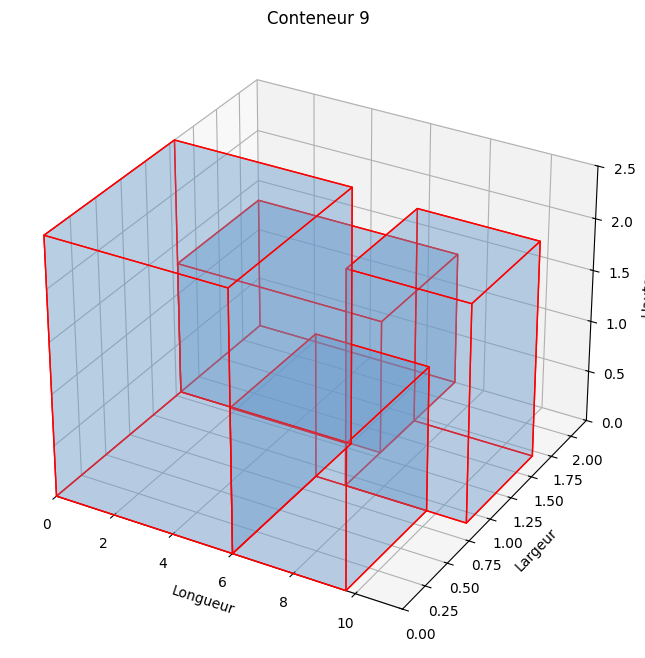


Conteneur 10:
Marchandise ID: 37, Désignation: Aluminium, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.3, 1.2)
Marchandise ID: 39, Désignation: Quincaillerie, Position: (0.0, 0.0, 1.2), Dimensions: (6.0, 1.1, 1.0)
Marchandise ID: 42, Désignation: Acier , Position: (0.0, 1.3, 0.0), Dimensions: (8.0, 0.9, 1.7)
Marchandise ID: 49, Désignation: Semi conducteurs, Position: (6.0, 0.0, 0.0), Dimensions: (4.9, 0.9, 2.5)
Marchandise ID: 90, Désignation: Pneus , Position: (8.0, 0.9, 0.0), Dimensions: (3.0, 1.3, 1.7)


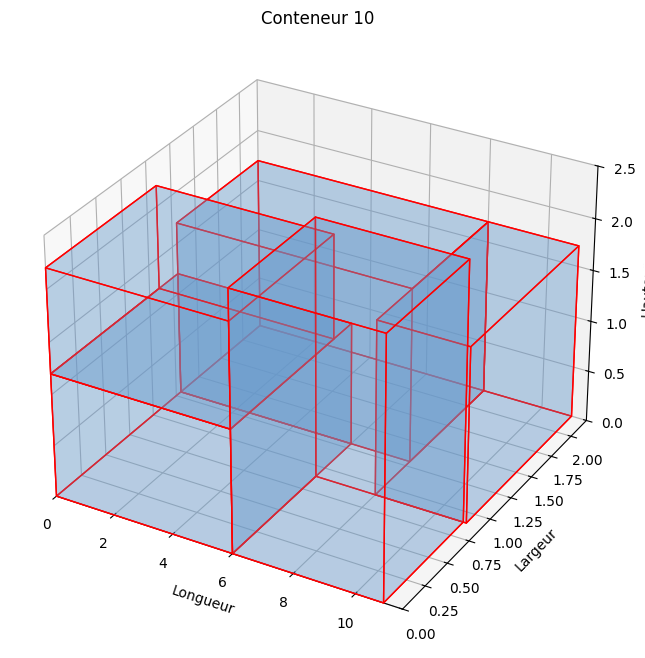


Conteneur 11:
Marchandise ID: 38, Désignation: Batteries automobile, Position: (0.0, 0.0, 0.0), Dimensions: (7.0, 1.4, 2.5)
Marchandise ID: 52, Désignation: Semi conducteurs, Position: (7.0, 0.0, 0.0), Dimensions: (3.3, 1.8, 2.3)
Marchandise ID: 74, Désignation: Contreplaqué, Position: (0.0, 1.4, 0.0), Dimensions: (5.0, 0.6, 1.8)


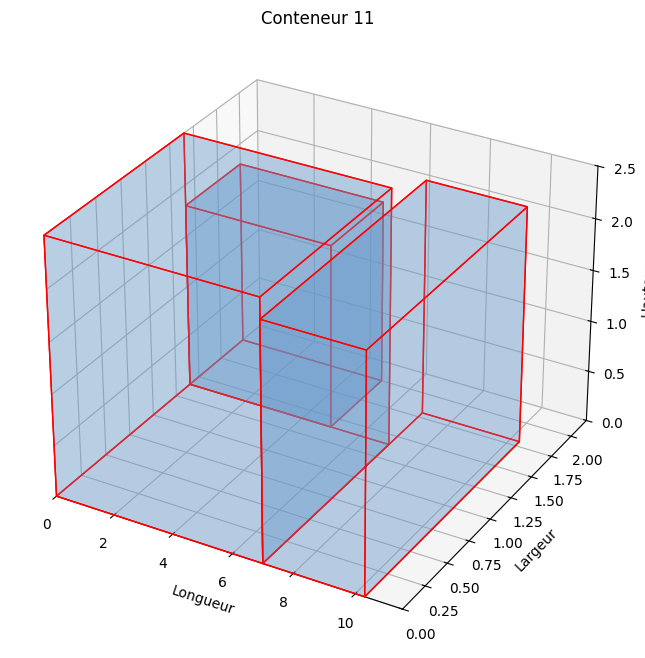


Conteneur 12:
Marchandise ID: 43, Désignation: Laine de bois, Position: (0.0, 0.0, 0.0), Dimensions: (8.0, 0.9, 1.8)
Marchandise ID: 50, Désignation: Semi conducteurs, Position: (0.0, 0.9, 0.0), Dimensions: (8.7, 1.3, 1.3)
Marchandise ID: 53, Désignation: Semi conducteurs, Position: (8.7, 0.0, 0.0), Dimensions: (2.6, 1.6, 2.3)
Marchandise ID: 80, Désignation: Contreplaqué, Position: (0.0, 0.0, 1.8), Dimensions: (5.0, 1.5, 0.7)
Marchandise ID: 95, Désignation: Pneus , Position: (5.0, 0.0, 1.8), Dimensions: (3.0, 1.8, 0.7)


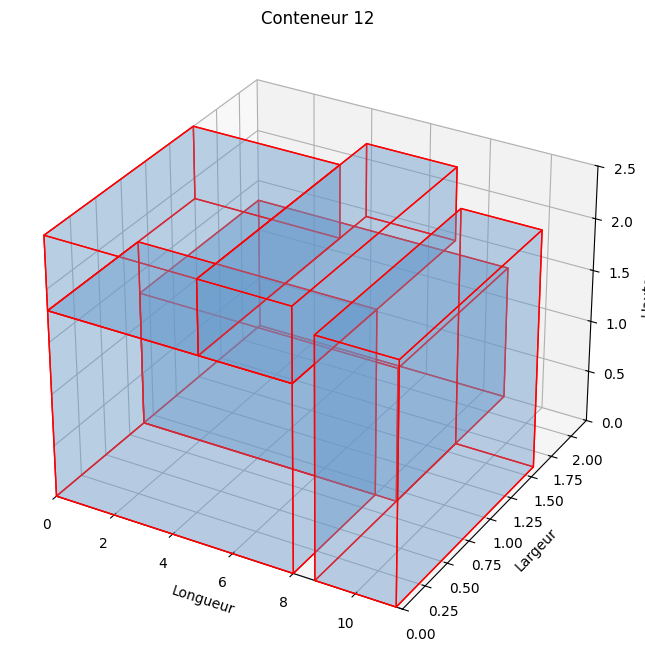


Conteneur 13:
Marchandise ID: 51, Désignation: Semi conducteurs, Position: (0.0, 0.0, 0.0), Dimensions: (6.1, 2.2, 2.3)
Marchandise ID: 54, Désignation: Semi conducteurs, Position: (6.1, 0.0, 0.0), Dimensions: (2.9, 1.6, 2.0)
Marchandise ID: 81, Désignation: Contreplaqué, Position: (6.1, 0.0, 2.0), Dimensions: (5.0, 2.2, 0.5)
Marchandise ID: 93, Désignation: Pneus , Position: (6.1, 1.6, 0.0), Dimensions: (3.0, 0.6, 1.9)
Marchandise ID: 98, Désignation: Pneus , Position: (9.1, 0.0, 0.0), Dimensions: (2.0, 2.1, 1.8)


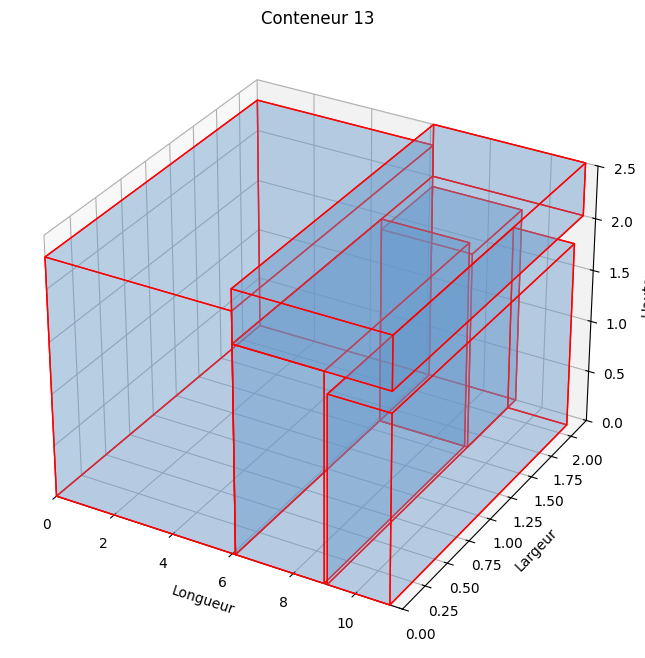


Conteneur 14:
Marchandise ID: 59, Désignation: Aluminium, Position: (0.0, 0.0, 0.0), Dimensions: (4.0, 2.1, 2.1)
Marchandise ID: 60, Désignation: Aluminium, Position: (4.0, 0.0, 0.0), Dimensions: (6.0, 1.5, 1.9)
Marchandise ID: 75, Désignation: Contreplaqué, Position: (4.0, 1.5, 0.0), Dimensions: (4.0, 0.7, 1.4)
Marchandise ID: 94, Désignation: Pneus , Position: (4.0, 0.0, 1.9), Dimensions: (5.0, 1.8, 0.5)


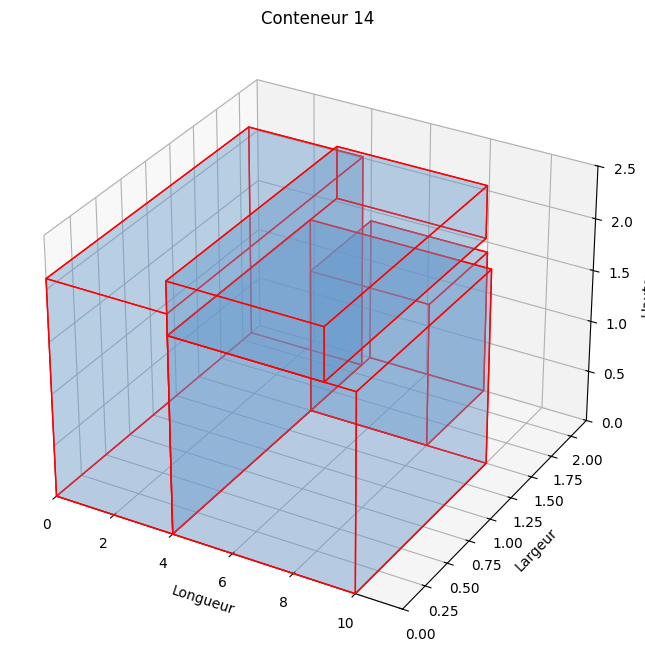


Conteneur 15:
Marchandise ID: 64, Désignation: Aluminium, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.8, 1.1)
Marchandise ID: 65, Désignation: Lithium, Position: (0.0, 0.0, 1.1), Dimensions: (6.0, 1.9, 0.9)
Marchandise ID: 66, Désignation: Lithium, Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 2.0, 2.2)


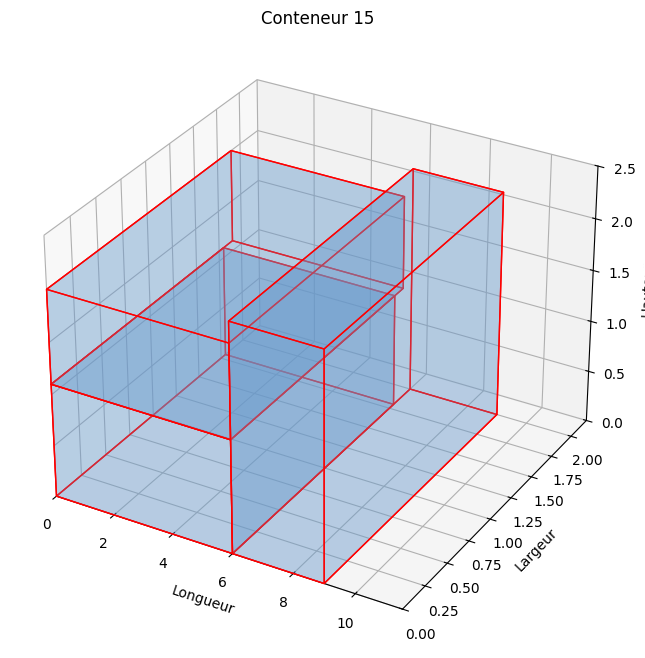


Conteneur 16:
Marchandise ID: 67, Désignation: Lithium, Position: (0.0, 0.0, 0.0), Dimensions: (4.0, 1.5, 0.9)
Marchandise ID: 68, Désignation: Lithium, Position: (4.0, 0.0, 0.0), Dimensions: (4.0, 2.1, 2.5)
Marchandise ID: 77, Désignation: Contreplaqué, Position: (8.0, 0.0, 0.0), Dimensions: (3.0, 1.5, 1.8)
Marchandise ID: 88, Désignation: Poutre , Position: (0.0, 0.0, 0.9), Dimensions: (3.0, 1.7, 1.1)


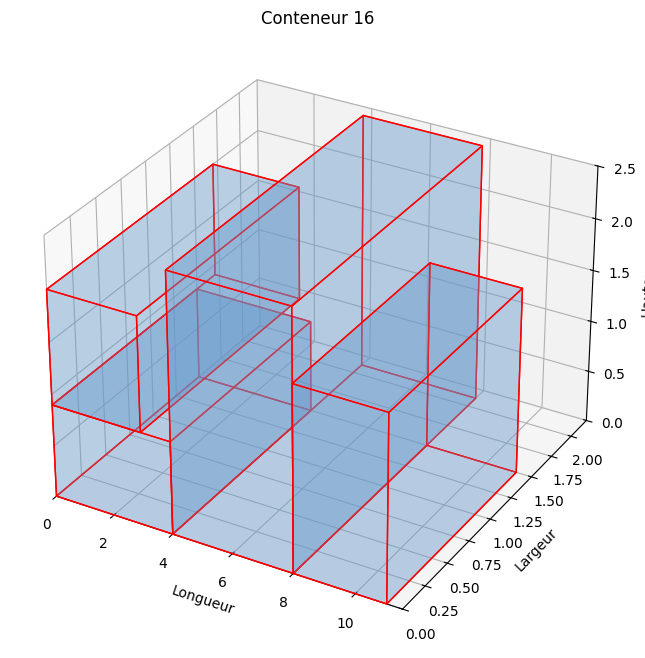


Conteneur 17:
Marchandise ID: 70, Désignation: Lithium, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.3, 2.0)
Marchandise ID: 72, Désignation: Contreplaqué, Position: (6.0, 0.0, 0.0), Dimensions: (4.0, 1.4, 2.0)


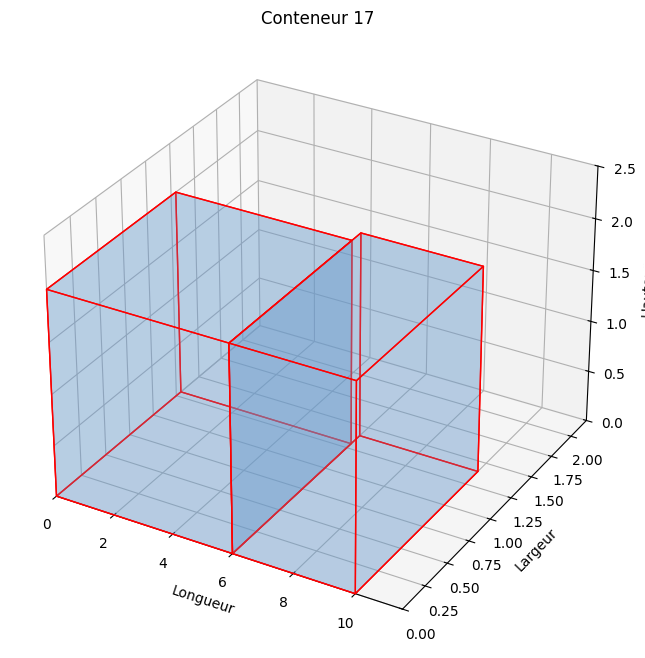


Conteneur 18:
Marchandise ID: 78, Désignation: Contreplaqué, Position: (0.0, 0.0, 0.0), Dimensions: (3.0, 1.4, 2.0)
Marchandise ID: 79, Désignation: Contreplaqué, Position: (3.0, 0.0, 0.0), Dimensions: (3.0, 2.0, 2.3)
Marchandise ID: 85, Désignation: Poutre , Position: (6.0, 0.0, 0.0), Dimensions: (5.0, 1.4, 0.7)
Marchandise ID: 91, Désignation: Pneus , Position: (6.0, 0.0, 0.7), Dimensions: (4.0, 1.5, 1.7)


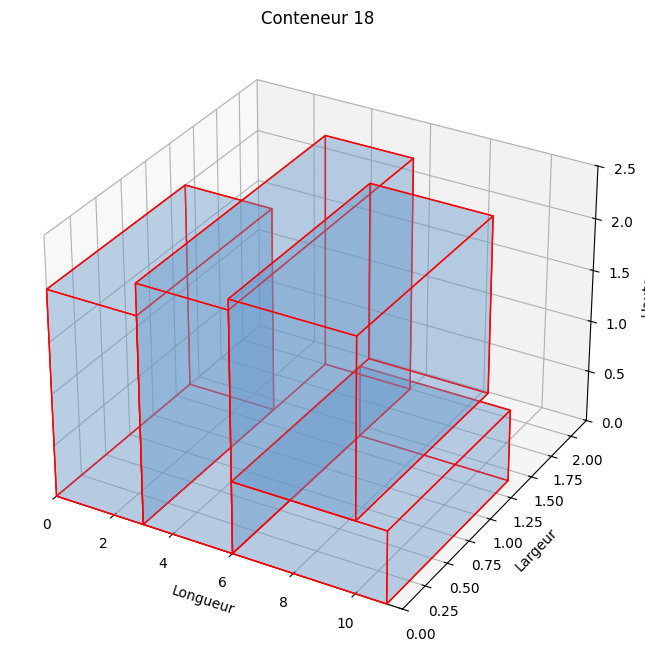


Conteneur 19:
Marchandise ID: 82, Désignation: Contreplaqué, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.2, 1.2)
Marchandise ID: 89, Désignation: Poutre , Position: (6.0, 0.0, 0.0), Dimensions: (5.0, 1.6, 2.1)
Marchandise ID: 100, Désignation: Pneus , Position: (0.0, 0.0, 1.2), Dimensions: (6.0, 1.2, 1.3)


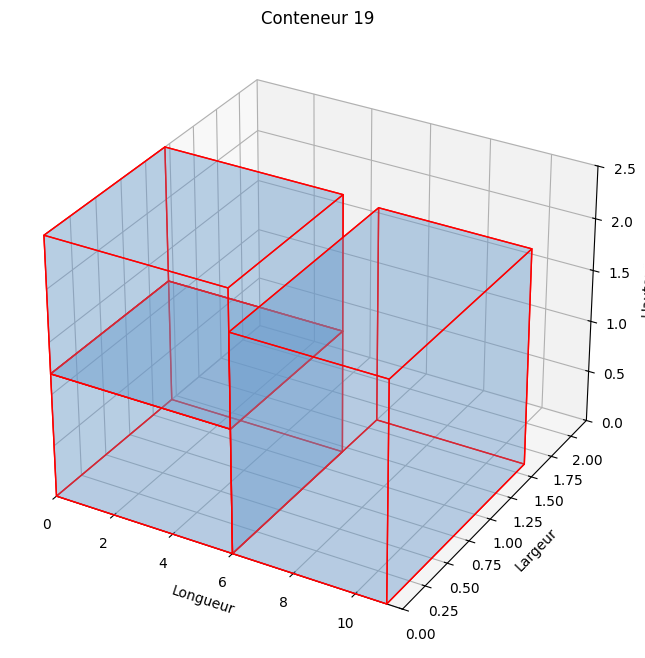


Conteneur 20:
Marchandise ID: 87, Désignation: Poutre , Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.2, 2.0)
Marchandise ID: 92, Désignation: Pneus , Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 1.5, 1.9)


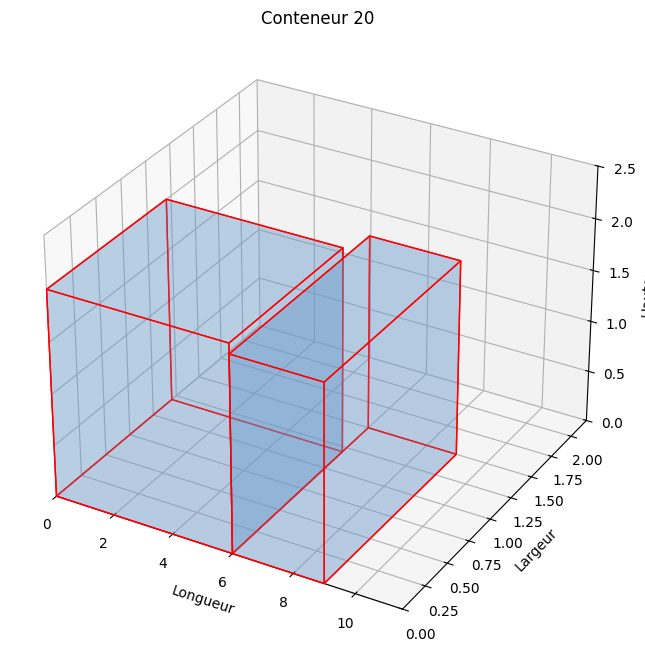


Conteneur 21:
Marchandise ID: 96, Désignation: Pneus , Position: (0.0, 0.0, 0.0), Dimensions: (4.0, 1.7, 1.4)


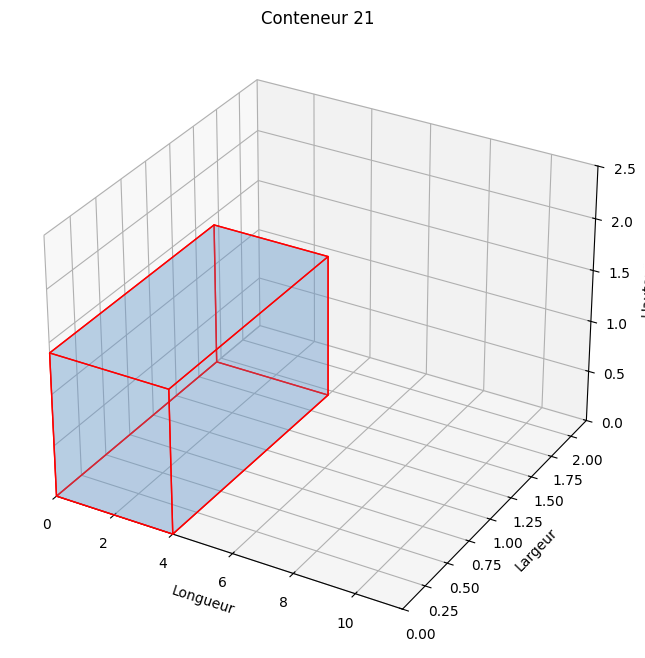

Temps d'exécution total du script: 11.2217 secondes


In [63]:
import pandas as pd
import os
import time
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import json

# Définition des dimensions du conteneur
CONTAINER_LENGTH = 11.5
CONTAINER_WIDTH = 2.2
CONTAINER_HEIGHT = 2.5

# Classe pour représenter une marchandise
class Marchandise:
    def __init__(self, id, designation, length, width, height):
        self.id = id
        self.designation = designation
        self.length = length
        self.width = width
        self.height = height
        self.position = None  # Coordonnées x, y, z dans le conteneur

# Classe pour représenter un conteneur
class Conteneur:
    def __init__(self, id):
        self.id = id
        self.contents = []  # Liste des marchandises
        # Création d'une grille 3D représentant le conteneur
        self.grid = [[[False for i in range(math.ceil(CONTAINER_HEIGHT * 10))] 
                      for i in range(math.ceil(CONTAINER_WIDTH * 10))] 
                      for i in range(math.ceil(CONTAINER_LENGTH * 10))]

    def peut_placer(self, marchandise):
        # Essayer de placer la marchandise dans la grille
        for x in range(math.ceil(CONTAINER_LENGTH * 10) - math.ceil(marchandise.length * 10) + 1):
            for y in range(math.ceil(CONTAINER_WIDTH * 10) - math.ceil(marchandise.width * 10) + 1):
                for z in range(math.ceil(CONTAINER_HEIGHT * 10) - math.ceil(marchandise.height * 10) + 1):
                    if self.est_libre(x, y, z, marchandise):
                        return (x / 10.0, y / 10.0, z / 10.0)  # Convertir les indices en float pour la position
        return None

    def est_libre(self, x, y, z, marchandise):
        # Vérifie si l'espace nécessaire pour la marchandise est libre
        for dx in range(math.ceil(marchandise.length * 10)):
            for dy in range(math.ceil(marchandise.width * 10)):
                for dz in range(math.ceil(marchandise.height * 10)):
                    if self.grid[x + dx][y + dy][z + dz]:
                        return False
        return True

    def place_marchandise(self, marchandise, position):
        # Place la marchandise dans la grille
        x, y, z = position
        for dx in range(math.ceil(marchandise.length * 10)):
            for dy in range(math.ceil(marchandise.width * 10)):
                for dz in range(math.ceil(marchandise.height * 10)):
                    self.grid[int(x * 10) + dx][int(y * 10) + dy][int(z * 10) + dz] = True
        marchandise.position = position
        self.contents.append(marchandise)
    
    def get_dimensions(self):
        return CONTAINER_LENGTH, CONTAINER_WIDTH, CONTAINER_HEIGHT

# Fonction pour lire les marchandises depuis un fichier Excel
def lire_marchandises(filepath):
    df = pd.read_excel(filepath)

    marchandises = []
    for index, row in df.iterrows():
        id = row['Numéro ']
        designation = row['Désignation']
        length = row['Longueur']
        width = row['Largeur']
        height = row['Hauteur']
        marchandises.append(Marchandise(id, designation, length, width, height))
    
    return marchandises

# Fonction pour charger les marchandises dans les conteneurs
def charger_marchandises(marchandises):
    conteneurs = []
    conteneur_id = 1

    start_time = time.time()  # Début de la mesure du temps pour le chargement des marchandises

    for marchandise in marchandises:
        place = False
        for conteneur in conteneurs:
            position = conteneur.peut_placer(marchandise)
            if position:
                conteneur.place_marchandise(marchandise, position)
                place = True
                break
        
        if not place:
            # Crée un nouveau conteneur si la marchandise ne peut pas être placée
            nouveau_conteneur = Conteneur(conteneur_id)
            conteneur_id += 1
            position = nouveau_conteneur.peut_placer(marchandise)
            nouveau_conteneur.place_marchandise(marchandise, position)
            conteneurs.append(nouveau_conteneur)

    end_time = time.time()  # Fin de la mesure du temps pour le chargement des marchandises
    print(f"Temps d'exécution pour charger les marchandises: {end_time - start_time:.4f} secondes")
    
    return conteneurs

# Fonction pour afficher un conteneur en 3D
def plot_conteneur_3d(conteneur):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    conteneur_length, conteneur_width, conteneur_height = conteneur.get_dimensions()

    for marchandise in conteneur.contents:
        position = marchandise.position
        dimensions = (marchandise.length, marchandise.width, marchandise.height)
        plot_item(ax, position, dimensions, (0.4, 0.6, 0.8))  # Couleur bleutée pour les marchandises

    ax.set_xlim(0, conteneur_length)
    ax.set_ylim(0, conteneur_width)
    ax.set_zlim(0, conteneur_height)

    ax.set_xlabel('Longueur')
    ax.set_ylabel('Largeur')
    ax.set_zlabel('Hauteur')
    ax.set_title(f'Conteneur {conteneur.id}')

    plt.show()

# Fonction pour tracer une marchandise dans un conteneur
def plot_item(ax, position, dimensions, color):
    x, y, z = position
    dx, dy, dz = dimensions
    vertices = [
        [x, y, z],
        [x + dx, y, z],
        [x + dx, y + dy, z],
        [x, y + dy, z],
        [x, y, z + dz],
        [x + dx, y, z + dz],
        [x + dx, y + dy, z + dz],
        [x, y + dy, z + dz]
    ]
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[4], vertices[7], vertices[3], vertices[0]]
    ]
    poly3d = Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='r', alpha=.25)
    ax.add_collection3d(poly3d)

# Fonction pour générer la structure JSON à partir des conteneurs chargés
def generer_structure_json(conteneurs):
    structure = {}
    
    for conteneur in conteneurs:
        wagon_key = f"wagon {conteneur.id}"
        structure[wagon_key] = {}
        
        for idx, marchandise in enumerate(conteneur.contents):
            objet_key = f"objet {idx + 1}"
            position_objet = {
                "x": marchandise.position[0],
                "y": marchandise.position[1],
                "z": marchandise.position[2]
            }
            structure[wagon_key][objet_key] = {
                "longueur": marchandise.length,
                "largeur": marchandise.width,
                "hauteur": marchandise.height,
                "designation": marchandise.designation,
                "position": position_objet
            }
    
    return structure

# Fonction pour calculer l'espace inutilisé total dans les wagons
def calculer_espace_inutilise_total(conteneurs):
    espace_inutilise_total = 0.0
    
    for conteneur in conteneurs:
        volume_conteneur = CONTAINER_LENGTH * CONTAINER_WIDTH * CONTAINER_HEIGHT
        volume_occupe = sum(marchandise.length * marchandise.width * marchandise.height for marchandise in conteneur.contents)
        espace_inutilise_total += volume_conteneur - volume_occupe
        
    return espace_inutilise_total

# Fonction principale
def main():
    file_path = os.path.join( "donnees_marchandise.xlsx")

    start_reading_time = time.time()
    marchandises = lire_marchandises(file_path)
    end_reading_time = time.time()
    print(f"Temps d'exécution pour lire les marchandises: {end_reading_time - start_reading_time:.4f} secondes")

    print("Marchandises lues depuis le fichier Excel:")
    for marchandise in marchandises:
        print(f"ID: {marchandise.id}, Désignation: {marchandise.designation}, Length: {marchandise.length}, Width: {marchandise.width}, Height: {marchandise.height}")

    start_loading_time = time.time()
    conteneurs = charger_marchandises(marchandises)
    end_loading_time = time.time()
    print(f"Temps d'exécution pour charger les marchandises dans les conteneurs: {end_loading_time - start_loading_time:.4f} secondes")

    # Générer la structure JSON à partir des conteneurs
    structure_json = generer_structure_json(conteneurs)
    
    # Écrire la structure JSON dans un fichier
    json_file_path = os.path.join( "d3online.json")
    with open(json_file_path, 'w', encoding='utf-8') as json_file:
        json.dump(structure_json, json_file, ensure_ascii=False, indent=4)
    print("\nEspace non utilisé totale", calculer_espace_inutilise_total(conteneurs))
    print(f"\nStructure JSON des conteneurs écrite dans {json_file_path}")

    print("\nNombre total de conteneurs utilisés:", len(conteneurs))
    for conteneur in conteneurs:
        print(f"\nConteneur {conteneur.id}:")
        for m in conteneur.contents:
            print(f"Marchandise ID: {m.id}, Désignation: {m.designation}, Position: {m.position}, Dimensions: ({m.length}, {m.width}, {m.height})")
        # Affichage 3D pour chaque conteneur
        plot_conteneur_3d(conteneur)

# Exécution de la fonction principale
if __name__ == "__main__":
    overall_start_time = time.time()
    main()
    overall_end_time = time.time()
    print(f"Temps d'exécution total du script: {overall_end_time - overall_start_time:.4f} secondes")


### Offline

Temps d'exécution pour lire les marchandises: 0.0279 secondes
Marchandises lues depuis le fichier Excel et triées par volume décroissant:
Numéro d'objet: 51, Désignation: Semi conducteurs, Length: 6.1, Width: 2.2, Height: 2.3
Numéro d'objet: 38, Désignation: Batteries automobile, Length: 7.0, Width: 1.4, Height: 2.5
Numéro d'objet: 68, Désignation: Lithium, Length: 4.0, Width: 2.1, Height: 2.5
Numéro d'objet: 36, Désignation: Textiles à recycler, Length: 6.0, Width: 1.3, Height: 2.5
Numéro d'objet: 31, Désignation: Tôles, Length: 6.0, Width: 1.9, Height: 1.6
Numéro d'objet: 28, Désignation: Carrelage, Length: 6.0, Width: 1.2, Height: 2.5
Numéro d'objet: 19, Désignation: Verre blanc vrac, Length: 9.0, Width: 0.9, Height: 2.2
Numéro d'objet: 59, Désignation: Aluminium, Length: 4.0, Width: 2.1, Height: 2.1
Numéro d'objet: 60, Désignation: Aluminium, Length: 6.0, Width: 1.5, Height: 1.9
Numéro d'objet: 13, Désignation: Troncs hêtres, Length: 7.0, Width: 1.6, Height: 1.5
Numéro d'objet: 89,

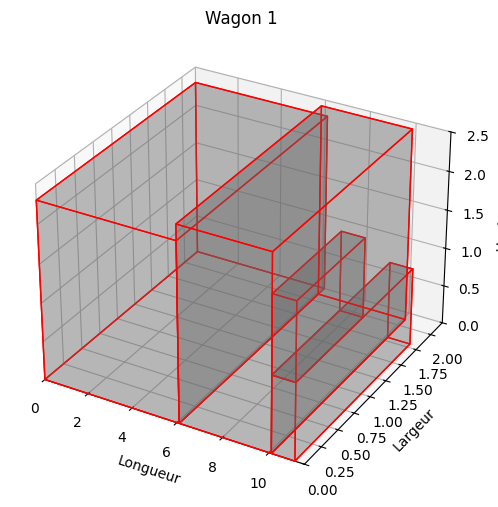


Conteneur 2:
Marchandise ID: 38, Désignation: Batteries automobile, Position: (0.0, 0.0, 0.0), Dimensions: (7.0, 1.4, 2.5)
Marchandise ID: 59, Désignation: Aluminium, Position: (7.0, 0.0, 0.0), Dimensions: (4.0, 2.1, 2.1)
Marchandise ID: 61, Désignation: Aluminium, Position: (0.0, 1.4, 0.0), Dimensions: (4.0, 0.8, 2.1)
Marchandise ID: 93, Désignation: Pneus , Position: (4.0, 1.4, 0.0), Dimensions: (3.0, 0.6, 1.9)


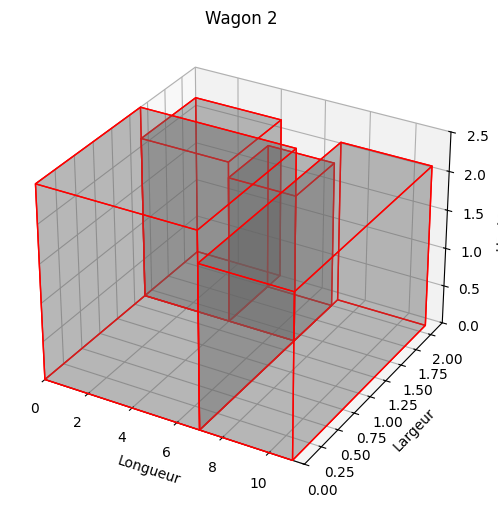


Conteneur 3:
Marchandise ID: 36, Désignation: Textiles à recycler, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.3, 2.5)
Marchandise ID: 19, Désignation: Verre blanc vrac, Position: (0.0, 1.3, 0.0), Dimensions: (9.0, 0.9, 2.2)
Marchandise ID: 21, Désignation: Briques rouges, Position: (6.0, 0.0, 0.0), Dimensions: (5.0, 1.1, 2.4)
Marchandise ID: 71, Désignation: Lithium, Position: (9.0, 1.1, 0.0), Dimensions: (2.0, 0.8, 1.1)
Marchandise ID: 99, Désignation: Pneus , Position: (9.0, 1.1, 1.1), Dimensions: (2.0, 0.7, 1.1)


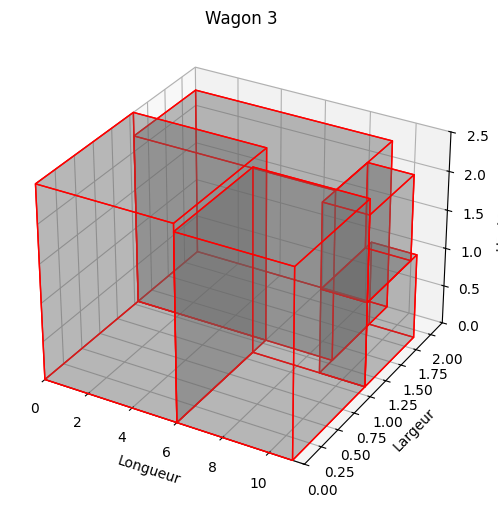


Conteneur 4:
Marchandise ID: 31, Désignation: Tôles, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.9, 1.6)
Marchandise ID: 89, Désignation: Poutre , Position: (6.0, 0.0, 0.0), Dimensions: (5.0, 1.6, 2.1)
Marchandise ID: 65, Désignation: Lithium, Position: (0.0, 0.0, 1.6), Dimensions: (6.0, 1.9, 0.9)
Marchandise ID: 74, Désignation: Contreplaqué, Position: (6.0, 1.6, 0.0), Dimensions: (5.0, 0.6, 1.8)
Marchandise ID: 73, Désignation: Contreplaqué, Position: (6.0, 1.6, 1.8), Dimensions: (5.0, 0.6, 0.5)


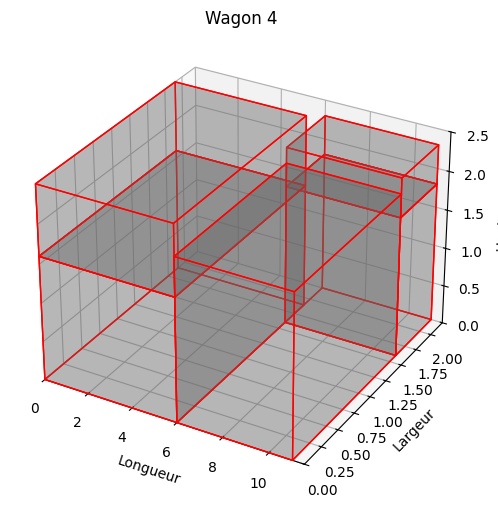


Conteneur 5:
Marchandise ID: 28, Désignation: Carrelage, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.2, 2.5)
Marchandise ID: 32, Désignation: Tôles, Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 2.2, 2.2)
Marchandise ID: 49, Désignation: Semi conducteurs, Position: (0.0, 1.2, 0.0), Dimensions: (4.9, 0.9, 2.5)
Marchandise ID: 62, Désignation: Aluminium, Position: (9.0, 0.0, 0.0), Dimensions: (2.0, 2.0, 2.3)


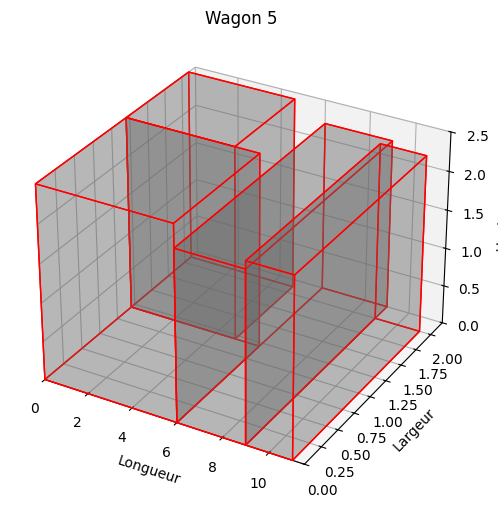


Conteneur 6:
Marchandise ID: 60, Désignation: Aluminium, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.5, 1.9)
Marchandise ID: 79, Désignation: Contreplaqué, Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 2.0, 2.3)
Marchandise ID: 98, Désignation: Pneus , Position: (9.0, 0.0, 0.0), Dimensions: (2.0, 2.1, 1.8)
Marchandise ID: 81, Désignation: Contreplaqué, Position: (0.0, 0.0, 1.9), Dimensions: (5.0, 2.2, 0.5)
Marchandise ID: 34, Désignation: Mobilier urbain, Position: (0.0, 1.5, 0.0), Dimensions: (4.0, 0.7, 1.9)
Marchandise ID: 55, Désignation: Aluminium, Position: (9.0, 0.0, 1.8), Dimensions: (2.0, 1.1, 0.6)


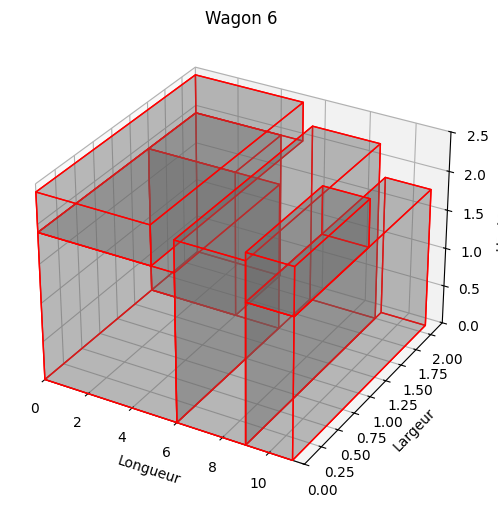


Conteneur 7:
Marchandise ID: 13, Désignation: Troncs hêtres, Position: (0.0, 0.0, 0.0), Dimensions: (7.0, 1.6, 1.5)
Marchandise ID: 30, Désignation: Tôles, Position: (0.0, 0.0, 1.5), Dimensions: (9.0, 1.7, 1.0)
Marchandise ID: 96, Désignation: Pneus , Position: (7.0, 0.0, 0.0), Dimensions: (4.0, 1.7, 1.4)
Marchandise ID: 29, Désignation: Tôles, Position: (0.0, 1.6, 0.0), Dimensions: (7.0, 0.6, 1.5)
Marchandise ID: 5, Désignation: Godet pelleteuse, Position: (9.0, 0.0, 1.4), Dimensions: (2.0, 2.0, 1.0)
Marchandise ID: 76, Désignation: Contreplaqué, Position: (0.0, 1.7, 1.5), Dimensions: (6.0, 0.5, 0.7)


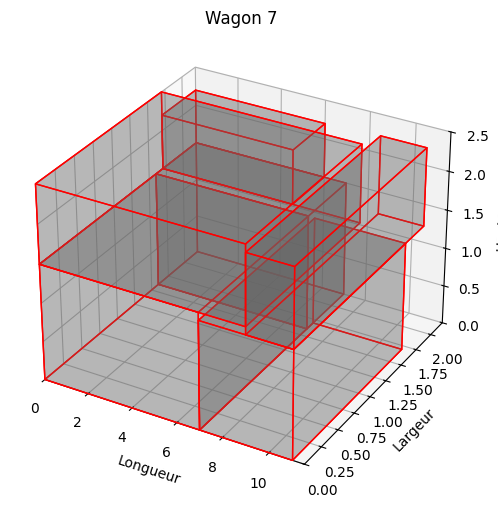


Conteneur 8:
Marchandise ID: 15, Désignation: Cuivre, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 2.0, 1.4)
Marchandise ID: 52, Désignation: Semi conducteurs, Position: (6.0, 0.0, 0.0), Dimensions: (3.3, 1.8, 2.3)
Marchandise ID: 64, Désignation: Aluminium, Position: (0.0, 0.0, 1.4), Dimensions: (6.0, 1.8, 1.1)
Marchandise ID: 26, Désignation: Tuiles, Position: (9.3, 0.0, 0.0), Dimensions: (2.0, 1.2, 2.3)


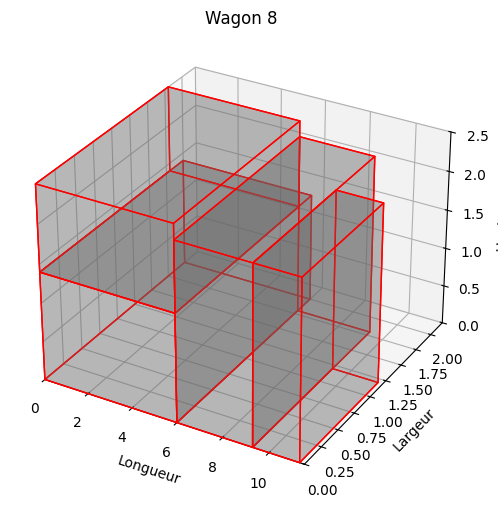


Conteneur 9:
Marchandise ID: 70, Désignation: Lithium, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.3, 2.0)
Marchandise ID: 66, Désignation: Lithium, Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 2.0, 2.2)
Marchandise ID: 47, Désignation: Semi conducteurs, Position: (0.0, 1.3, 0.0), Dimensions: (3.7, 0.9, 1.4)
Marchandise ID: 94, Désignation: Pneus , Position: (0.0, 0.0, 2.0), Dimensions: (5.0, 1.8, 0.5)
Marchandise ID: 45, Désignation: Chanvre isolation, Position: (9.0, 0.0, 0.0), Dimensions: (2.2, 1.6, 1.1)


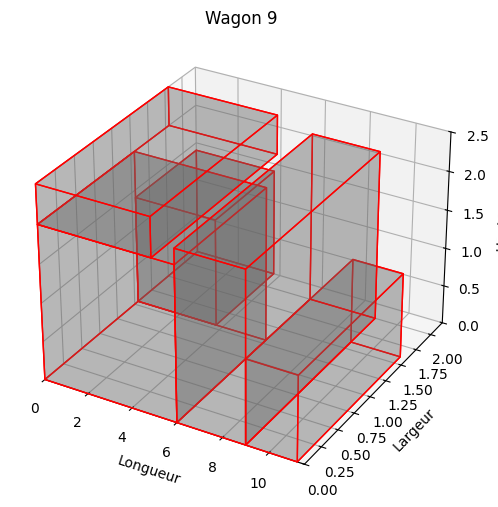


Conteneur 10:
Marchandise ID: 50, Désignation: Semi conducteurs, Position: (0.0, 0.0, 0.0), Dimensions: (8.7, 1.3, 1.3)
Marchandise ID: 43, Désignation: Laine de bois, Position: (0.0, 1.3, 0.0), Dimensions: (8.0, 0.9, 1.8)
Marchandise ID: 2, Désignation: Tubes acier, Position: (0.0, 0.0, 1.8), Dimensions: (9.0, 2.0, 0.7)
Marchandise ID: 1, Désignation: Tubes acier, Position: (0.0, 0.0, 1.3), Dimensions: (10.0, 1.0, 0.5)
Marchandise ID: 69, Désignation: Lithium, Position: (8.7, 1.0, 0.0), Dimensions: (2.0, 1.2, 1.5)


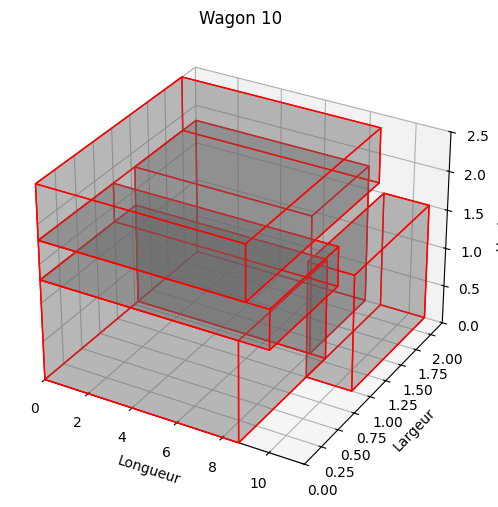


Conteneur 11:
Marchandise ID: 87, Désignation: Poutre , Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.2, 2.0)
Marchandise ID: 14, Désignation: Pompe à chaleur, Position: (6.0, 0.0, 0.0), Dimensions: (5.0, 1.1, 2.3)
Marchandise ID: 42, Désignation: Acier , Position: (0.0, 1.2, 0.0), Dimensions: (8.0, 0.9, 1.7)
Marchandise ID: 57, Désignation: Aluminium, Position: (0.0, 1.2, 1.7), Dimensions: (6.0, 1.0, 0.8)
Marchandise ID: 33, Désignation: Tôles, Position: (8.0, 1.1, 0.0), Dimensions: (3.0, 0.5, 2.2)
Marchandise ID: 84, Désignation: Poutre , Position: (8.0, 1.6, 0.0), Dimensions: (3.0, 0.5, 1.9)
Marchandise ID: 6, Désignation: Rails , Position: (0.0, 0.0, 2.3), Dimensions: (11.0, 1.0, 0.2)


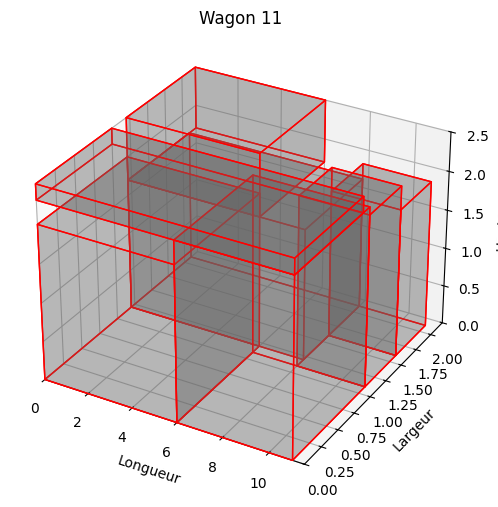


Conteneur 12:
Marchandise ID: 22, Désignation: Pièces métalliques, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.6, 1.4)
Marchandise ID: 12, Désignation: Troncs chênes, Position: (0.0, 0.0, 1.4), Dimensions: (6.0, 1.9, 1.0)
Marchandise ID: 72, Désignation: Contreplaqué, Position: (6.0, 0.0, 0.0), Dimensions: (4.0, 1.4, 2.0)
Marchandise ID: 11, Désignation: Bois vrac, Position: (6.0, 1.4, 0.0), Dimensions: (5.0, 0.8, 1.0)
Marchandise ID: 48, Désignation: Semi conducteurs, Position: (0.0, 1.6, 0.0), Dimensions: (5.6, 0.5, 1.4)
Marchandise ID: 75, Désignation: Contreplaqué, Position: (6.0, 1.4, 1.0), Dimensions: (4.0, 0.7, 1.4)
Marchandise ID: 10, Désignation: Ciment, Position: (6.0, 0.0, 2.0), Dimensions: (4.0, 1.0, 0.5)


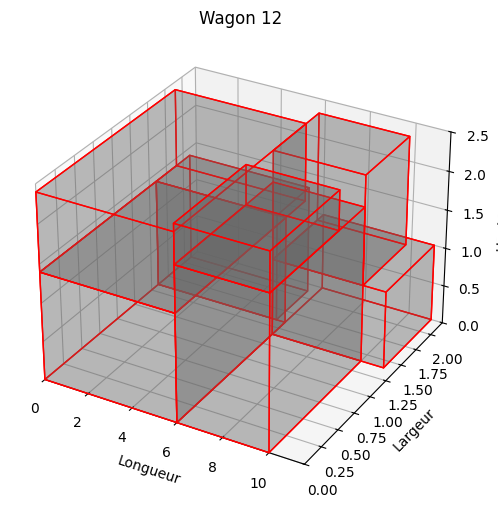


Conteneur 13:
Marchandise ID: 44, Désignation: Ouate de cellusose, Position: (0.0, 0.0, 0.0), Dimensions: (5.0, 1.7, 1.2)
Marchandise ID: 91, Désignation: Pneus , Position: (5.0, 0.0, 0.0), Dimensions: (4.0, 1.5, 1.7)
Marchandise ID: 35, Désignation: Lin , Position: (0.0, 0.0, 1.2), Dimensions: (5.0, 2.2, 0.7)
Marchandise ID: 80, Désignation: Contreplaqué, Position: (5.0, 0.0, 1.7), Dimensions: (5.0, 1.5, 0.7)
Marchandise ID: 58, Désignation: Aluminium, Position: (0.0, 0.0, 1.9), Dimensions: (5.0, 1.3, 0.6)
Marchandise ID: 27, Désignation: Vitraux, Position: (5.0, 1.5, 0.0), Dimensions: (4.0, 0.7, 1.2)
Marchandise ID: 86, Désignation: Poutre , Position: (5.0, 1.5, 1.2), Dimensions: (6.0, 0.7, 0.7)
Marchandise ID: 41, Désignation: Treuil, Position: (0.0, 1.5, 1.9), Dimensions: (8.0, 0.5, 0.5)


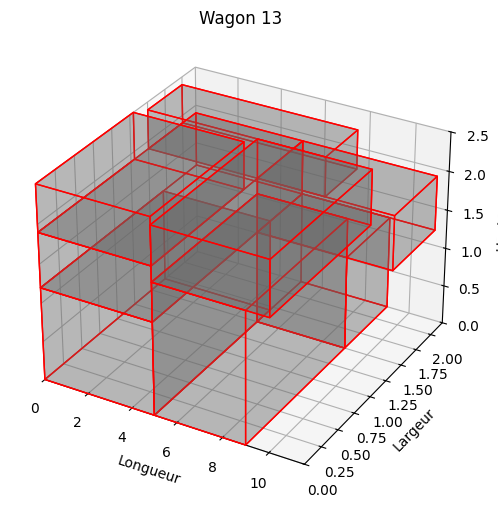


Conteneur 14:
Marchandise ID: 53, Désignation: Semi conducteurs, Position: (0.0, 0.0, 0.0), Dimensions: (2.6, 1.6, 2.3)
Marchandise ID: 37, Désignation: Aluminium, Position: (2.6, 0.0, 0.0), Dimensions: (6.0, 1.3, 1.2)
Marchandise ID: 100, Désignation: Pneus , Position: (2.6, 0.0, 1.2), Dimensions: (6.0, 1.2, 1.3)
Marchandise ID: 54, Désignation: Semi conducteurs, Position: (8.6, 0.0, 0.0), Dimensions: (2.9, 1.6, 2.0)
Marchandise ID: 63, Désignation: Aluminium, Position: (2.6, 1.2, 1.2), Dimensions: (4.0, 1.0, 1.1)
Marchandise ID: 16, Désignation: Zinc, Position: (2.6, 1.3, 0.0), Dimensions: (5.0, 0.8, 0.8)
Marchandise ID: 56, Désignation: Aluminium, Position: (6.6, 1.6, 0.8), Dimensions: (3.0, 0.6, 1.2)


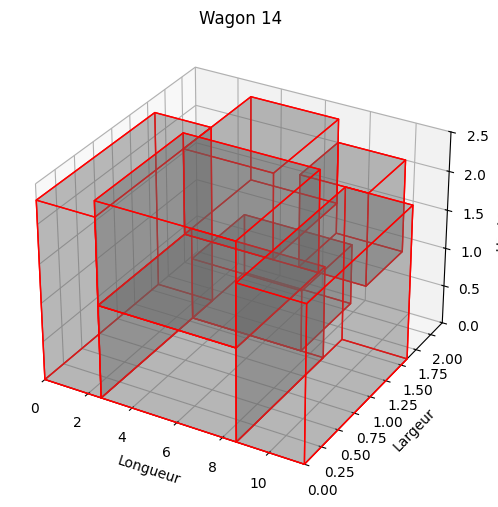


Conteneur 15:
Marchandise ID: 24, Désignation: Pièces métalliques, Position: (0.0, 0.0, 0.0), Dimensions: (3.0, 1.6, 1.9)
Marchandise ID: 18, Désignation: Carton, Position: (3.0, 0.0, 0.0), Dimensions: (7.0, 1.0, 1.3)
Marchandise ID: 82, Désignation: Contreplaqué, Position: (3.0, 0.0, 1.3), Dimensions: (6.0, 1.2, 1.2)
Marchandise ID: 40, Désignation: Treuil, Position: (3.0, 1.0, 0.0), Dimensions: (7.0, 0.9, 1.3)
Marchandise ID: 23, Désignation: Pièces métalliques, Position: (3.0, 1.2, 1.3), Dimensions: (7.0, 0.9, 1.2)
Marchandise ID: 9, Désignation: Verre, Position: (0.0, 0.0, 1.9), Dimensions: (3.0, 2.1, 0.6)


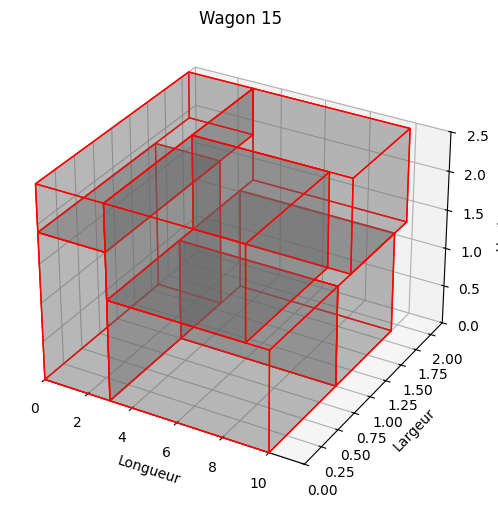


Conteneur 16:
Marchandise ID: 92, Désignation: Pneus , Position: (0.0, 0.0, 0.0), Dimensions: (3.0, 1.5, 1.9)
Marchandise ID: 78, Désignation: Contreplaqué, Position: (3.0, 0.0, 0.0), Dimensions: (3.0, 1.4, 2.0)
Marchandise ID: 77, Désignation: Contreplaqué, Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 1.5, 1.8)
Marchandise ID: 85, Désignation: Poutre , Position: (6.0, 0.0, 1.8), Dimensions: (5.0, 1.4, 0.7)
Marchandise ID: 7, Désignation: Tubes PVC, Position: (0.0, 0.0, 1.9), Dimensions: (3.0, 2.0, 0.6)
Marchandise ID: 83, Désignation: Poutre , Position: (3.0, 1.4, 1.8), Dimensions: (5.0, 0.8, 0.7)


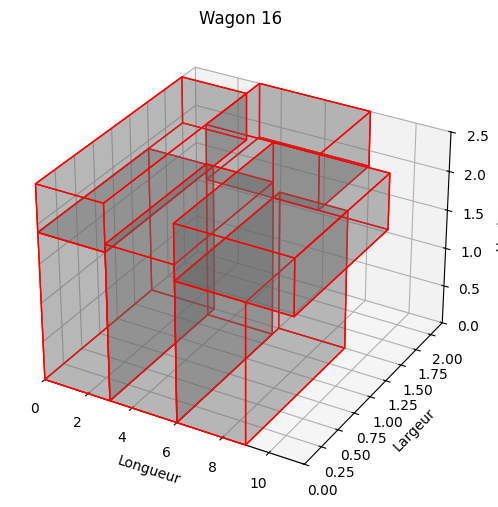


Conteneur 17:
Marchandise ID: 8, Désignation: Echaffaudage, Position: (0.0, 0.0, 0.0), Dimensions: (3.0, 1.3, 1.8)
Marchandise ID: 90, Désignation: Pneus , Position: (3.0, 0.0, 0.0), Dimensions: (3.0, 1.3, 1.7)
Marchandise ID: 88, Désignation: Poutre , Position: (6.0, 0.0, 0.0), Dimensions: (3.0, 1.7, 1.1)
Marchandise ID: 67, Désignation: Lithium, Position: (6.0, 0.0, 1.1), Dimensions: (4.0, 1.5, 0.9)
Marchandise ID: 17, Désignation: Papier, Position: (0.0, 0.0, 1.8), Dimensions: (4.0, 1.6, 0.6)
Marchandise ID: 3, Désignation: Tubes acier, Position: (4.0, 0.0, 2.0), Dimensions: (7.5, 1.2, 0.4)


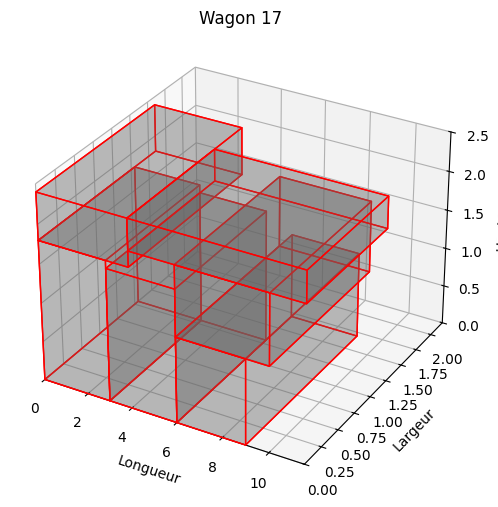


Conteneur 18:
Marchandise ID: 39, Désignation: Quincaillerie, Position: (0.0, 0.0, 0.0), Dimensions: (6.0, 1.1, 1.0)
Marchandise ID: 46, Désignation: Moteur élecrique, Position: (0.0, 0.0, 1.0), Dimensions: (4.2, 1.5, 0.8)
Marchandise ID: 20, Désignation: Verre brun vrac, Position: (4.2, 0.0, 1.0), Dimensions: (3.0, 1.6, 0.9)
Marchandise ID: 95, Désignation: Pneus , Position: (0.0, 0.0, 1.8), Dimensions: (3.0, 1.8, 0.7)
Marchandise ID: 97, Désignation: Pneus , Position: (3.0, 0.0, 1.9), Dimensions: (4.0, 1.5, 0.5)


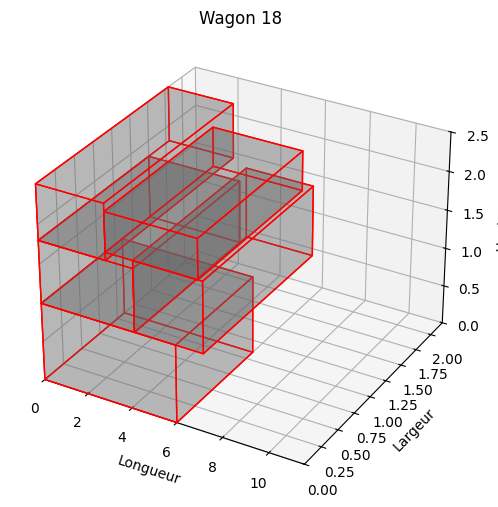

Temps d'exécution total du script: 16.6025 secondes


In [62]:
import pandas as pd
import os
import time
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import json

# Définition des dimensions du conteneur
CONTAINER_LENGTH = 11.5
CONTAINER_WIDTH = 2.2
CONTAINER_HEIGHT = 2.5

# Classe pour représenter une marchandise
class Marchandise:
    def __init__(self, id, designation, length, width, height):
        self.id = id
        self.designation = designation
        self.length = length
        self.width = width
        self.height = height
        self.position = None  # Coordonnées x, y, z dans le conteneur

# Classe pour représenter un conteneur
class Conteneur:
    def __init__(self, id):
        self.id = id
        self.contents = []  # Liste des marchandises
        # Création d'une grille 3D représentant le conteneur
        self.grid = [[[False for _ in range(math.ceil(CONTAINER_HEIGHT * 10))] for _ in range(math.ceil(CONTAINER_WIDTH * 10))] for _ in range(math.ceil(CONTAINER_LENGTH * 10))]

    def peut_placer(self, marchandise):
        # Essayer de placer la marchandise dans la grille
        for x in range(math.ceil(CONTAINER_LENGTH * 10) - math.ceil(marchandise.length * 10) + 1):
            for y in range(math.ceil(CONTAINER_WIDTH * 10) - math.ceil(marchandise.width * 10) + 1):
                for z in range(math.ceil(CONTAINER_HEIGHT * 10) - math.ceil(marchandise.height * 10) + 1):
                    if self.est_libre(x, y, z, marchandise):
                        return (x / 10.0, y / 10.0, z / 10.0)  # Convertir les indices en float pour la position
        return None

    def est_libre(self, x, y, z, marchandise):
        # Vérifie si l'espace nécessaire pour la marchandise est libre
        for dx in range(math.ceil(marchandise.length * 10)):
            for dy in range(math.ceil(marchandise.width * 10)):
                for dz in range(math.ceil(marchandise.height * 10)):
                    if self.grid[x + dx][y + dy][z + dz]:
                        return False
        return True

    def place_marchandise(self, marchandise, position):
        # Place la marchandise dans la grille
        x, y, z = position
        for dx in range(math.ceil(marchandise.length * 10)):
            for dy in range(math.ceil(marchandise.width * 10)):
                for dz in range(math.ceil(marchandise.height * 10)):
                    self.grid[int(x * 10) + dx][int(y * 10) + dy][int(z * 10) + dz] = True
        marchandise.position = position
        self.contents.append(marchandise)

    def get_dimensions(self):
        return CONTAINER_LENGTH, CONTAINER_WIDTH, CONTAINER_HEIGHT

    def get_contents_with_positions(self):
        contents_info = []
        for marchandise in self.contents:
            contents_info.append({
                'id': marchandise.id,
                'longueur': marchandise.length,
                'largeur': marchandise.width,
                'hauteur': marchandise.height,
                'designation': marchandise.designation,
                'position': {
                    'x': marchandise.position[0],
                    'y': marchandise.position[1],
                    'z': marchandise.position[2]
                }
            })
        return contents_info

# Fonction pour lire les marchandises depuis un fichier Excel et les trier par volume
def lire_marchandises(filepath):
    df = pd.read_excel(filepath)

    marchandises = []
    for index, row in df.iterrows():
        id = row['Numéro ']
        designation = row['Désignation']
        length = row['Longueur']
        width = row['Largeur']
        height = row['Hauteur']
        marchandises.append(Marchandise(id, designation, length, width, height))
    
    # Tri des marchandises par volume (length * width * height)
    marchandises.sort(key=lambda m: m.length * m.width * m.height, reverse=True)
    
    return marchandises

# Fonction pour charger les marchandises triées dans les conteneurs
def charger_marchandises(marchandises):
    conteneurs = []
    wagon_id = 1

    start_time = time.time()  # Début de la mesure du temps pour le chargement des marchandises

    for marchandise in marchandises:
        place = False
        for conteneur in conteneurs:
            position = conteneur.peut_placer(marchandise)
            if position:
                conteneur.place_marchandise(marchandise, position)
                place = True
                break
        
        if not place:
            # Crée un nouveau conteneur si la marchandise ne peut pas être placée
            nouveau_conteneur = Conteneur(wagon_id)
            wagon_id += 1
            position = nouveau_conteneur.peut_placer(marchandise)
            nouveau_conteneur.place_marchandise(marchandise, position)
            conteneurs.append(nouveau_conteneur)

    end_time = time.time()  # Fin de la mesure du temps pour le chargement des marchandises
    print(f"Temps d'exécution pour charger les marchandises: {end_time - start_time:.4f} secondes")
    
    return conteneurs

# Fonction principale
def main():
    file_path = os.path.join( "donnees_marchandise.xlsx")

    start_reading_time = time.time()
    marchandises = lire_marchandises(file_path)
    end_reading_time = time.time()
    print(f"Temps d'exécution pour lire les marchandises: {end_reading_time - start_reading_time:.4f} secondes")

    print("Marchandises lues depuis le fichier Excel et triées par volume décroissant:")
    for marchandise in marchandises:
        print(f"Numéro d'objet: {marchandise.id}, Désignation: {marchandise.designation}, Length: {marchandise.length}, Width: {marchandise.width}, Height: {marchandise.height}")

    start_loading_time = time.time()
    conteneurs = charger_marchandises(marchandises)
    end_loading_time = time.time()
    print(f"Temps d'exécution pour charger les marchandises dans les conteneurs: {end_loading_time - start_loading_time:.4f} secondes")

    print("\nNombre total de wagons utilisés:", len(conteneurs))
    print("\nEspace non utilisé totale", calculer_espace_inutilise_total(conteneurs))

    # Générer la structure JSON à partir des conteneurs chargés
    json_data = generer_structure_json(conteneurs)

    # Écrire le JSON dans un fichier
    json_file_path = os.path.join( "d3offline.json")
    with open(json_file_path, 'w', encoding='utf-8') as json_file:
        json.dump(json_data, json_file, indent=4)  # Utilisation de json.dump pour écrire la structure JSON

    print(f"\nStructure JSON des conteneurs écrite dans {json_file_path}")

    print("\nNombre total de conteneurs utilisés:", len(conteneurs))
    for conteneur in conteneurs:
        print(f"\nConteneur {conteneur.id}:")
        for m in conteneur.contents:
            print(f"Marchandise ID: {m.id}, Désignation: {m.designation}, Position: {m.position}, Dimensions: ({m.length}, {m.width}, {m.height})")
        # Affichage 3D pour chaque conteneur
        plot_conteneur_3d(conteneur)

# Fonction pour afficher un conteneur en 3D
def plot_conteneur_3d(conteneur):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    conteneur_length, conteneur_width, conteneur_height = conteneur.get_dimensions()

    for marchandise in conteneur.contents:
        position = marchandise.position
        dimensions = (marchandise.length, marchandise.width, marchandise.height)
        plot_item(ax, position, dimensions, (0.4, 0.4, 0.4))

    ax.set_xlim(0, conteneur_length)
    ax.set_ylim(0, conteneur_width)
    ax.set_zlim(0, conteneur_height)

    ax.set_xlabel('Longueur')
    ax.set_ylabel('Largeur')
    ax.set_zlabel('Hauteur')
    ax.set_title(f'Wagon {conteneur.id}')

    plt.show()

# Fonction pour tracer une marchandise dans un conteneur
def plot_item(ax, position, dimensions, color):
    x, y, z = position
    dx, dy, dz = dimensions
    vertices = [
        [x, y, z],
        [x + dx, y, z],
        [x + dx, y + dy, z],
        [x, y + dy, z],
        [x, y, z + dz],
        [x + dx, y, z + dz],
        [x + dx, y + dy, z + dz],
        [x, y + dy, z + dz]
    ]
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[4], vertices[7], vertices[3], vertices[0]]
    ]
    poly3d = Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='r', alpha=.25)
    ax.add_collection3d(poly3d)

# Fonction pour générer le JSON à partir des conteneurs chargés
def generer_structure_json(conteneurs):
    structure = {}
    
    for conteneur in conteneurs:
        wagon_key = f"wagon {conteneur.id}"
        structure[wagon_key] = {}
        
        for idx, marchandise in enumerate(conteneur.contents):
            objet_key = f"objet {idx + 1}"
            position_objet = {
                "x": marchandise.position[0],
                "y": marchandise.position[1],
                "z": marchandise.position[2]
            }
            structure[wagon_key][objet_key] = {
                "longueur": marchandise.length,
                "largeur": marchandise.width,
                "hauteur": marchandise.height,
                "designation": marchandise.designation,
                "position": position_objet
            }
    
    return structure

# Fonction pour calculer l'espace inutilisé total dans les wagons
def calculer_espace_inutilise_total(conteneurs):
    espace_inutilise_total = 0.0
    
    for conteneur in conteneurs:
        volume_conteneur = CONTAINER_LENGTH * CONTAINER_WIDTH * CONTAINER_HEIGHT
        volume_occupe = sum(marchandise.length * marchandise.width * marchandise.height for marchandise in conteneur.contents)
        espace_inutilise_total += volume_conteneur - volume_occupe
        
    return espace_inutilise_total

# Exécution de la fonction principale
if __name__ == "__main__":
    overall_start_time = time.time()
    main()
    overall_end_time = time.time()
    print(f"Temps d'exécution total du script: {overall_end_time - overall_start_time:.4f} secondes")
